# Titanic: Aprendizaje Automático a Partir de Desastres 
**Maestría en Ciencia de Datos - FDA I**

* Alejandra Ruiz
* Daniel Martinez
* Juan Camilo Vergara
* Felipe Montenegro

## Preparación previa de los datos

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [284]:
len(df_test_models)

418

In [285]:
# Carga de la información del conjunto de prueba

'''Se lleva a cabo un merge de la información del conjunto de prueba y las etiquetas de las predicciones'''

data_test = pd.read_csv('./dataset/test.csv')
data_survived = pd.read_csv('./dataset/survived.csv')

data_test_new = pd.merge(data_test, data_survived, on='PassengerId')
data_test_merged = data_test.merge(data_survived, on='PassengerId', how='outer', indicator=True)
print({
	"right_only": len(data_test_merged[data_test_merged['_merge'] == 'right_only']),
	"left_only": len(data_test_merged[data_test_merged['_merge'] == 'left_only']),
	"both": len(data_test_merged[data_test_merged['_merge'] == 'both'])
})
data_test_merged.drop('_merge', axis=1, inplace=True)

{'right_only': 0, 'left_only': 0, 'both': 418}


In [286]:
data_test_merged

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


### **1.Limpieza y EDA**

In [287]:
#Lectura del data set

df_titanic = pd.read_csv("dataset/train.csv")

In [288]:
#Revisión de la estructura de la base de datos

df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
#Análisis de los tipos de datos

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Análisis de Registros duplicados**

In [290]:
duplicados = df_titanic.duplicated('PassengerId').sum()

print("El número de registros duplicados por ID de pasajero es: ", duplicados)

El número de registros duplicados por ID de pasajero es:  0


**Análisis de Datos Nulos**

In [291]:
#Identificación de datos nulos en la BD

print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Análisis:** se identificaron un total de 2 variables con una cantidad importante de datos faltantes, estas corresponden a "Age" (177 valores nulos) y "Cabin" (687).

In [292]:
#Manejo de datos nulos para la variable edad. Se lleva a cabo la imputación por la mediana

df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

**Análisis**: se llevó a cabo la imputación de los valores nulos de la variable edad a través de la mediana, teniendo en cuenta que esta medida de tendencia central es robuzta frente a los valores atípicos, a diferencia de la media que si se puede ver afectada por este tipo de anomalías en los datos.

In [293]:
#Manejo de datos nulos para la variable Embarked

df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

**Análisis**: teniendo en cuenta que solamente se identificó la presencia de dos valores nulos y al tratarse de una variable categórica, se propuso la imputación de los valores faltantes a través de la moda de la característica evaluada.

In [294]:
# La variable Cabin se eliminará del Dataset debido a una alta presencia de datos nulos. 

df_titanic.drop(columns='Cabin', inplace=True)


**Análisis:** en este caso, en la variable Cabin el 77% de la información corresponde a datos faltantes. Por tanto, puede ser poco relevante para el análisis posterior. Adicionalmente, si se imputa el 77% de dicha variable se podría presentar un problema de sesgo a las estimaciones.

In [295]:
#Validación de cantidad de nulos después de la limpieza.

print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Estadísticas Descriptivas**

In [296]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **Análisis Gráfico**

Se procederá a realizar un análisis de la relación que existe entre los atributos de los pasajeros y la información asociada a la supervivencia de los mismos. 

**Distribución de la edad de los pasajeros**

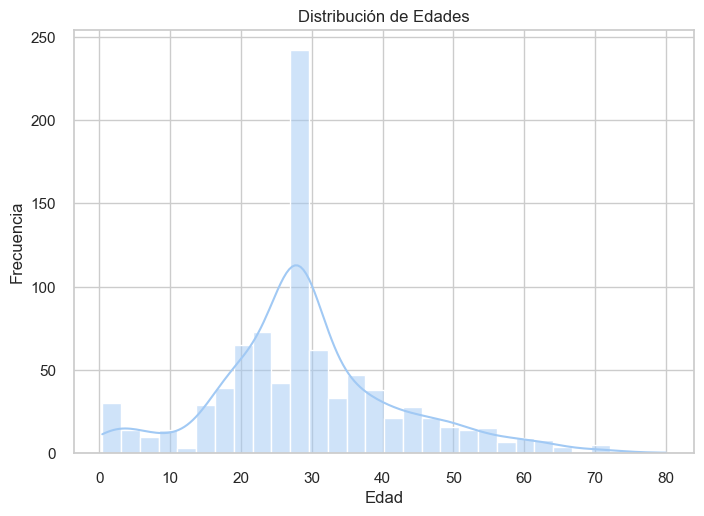

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de las edades de los pasajeros


sns.histplot(df_titanic['Age'], bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Distribución de la edad de los pasajeros según sexo**

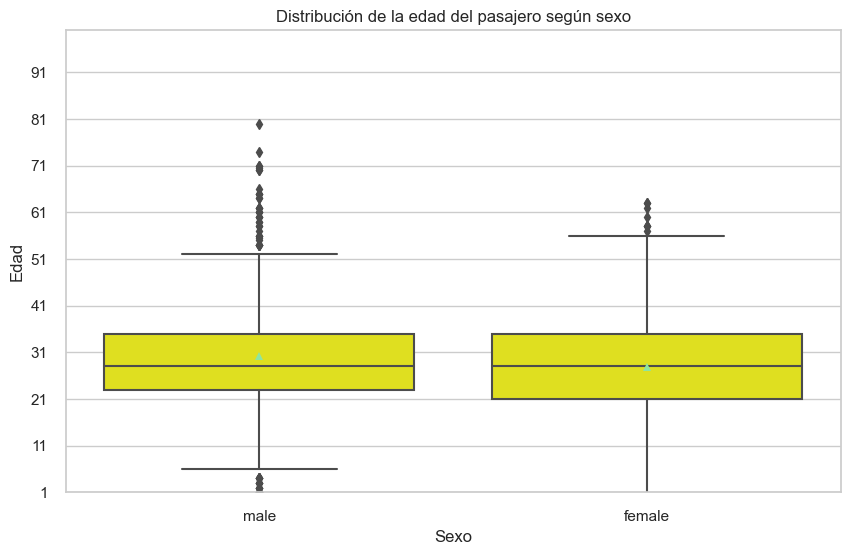

In [298]:
#Identificación de la distribución de las edades de los pasajeros según el género del mismo

# Tamaño del gráfico

plt.figure(figsize=(10, 6))

# Creación del boxplot

boxplot_edades = sns.boxplot(x=df_titanic['Sex'], y=df_titanic['Age'], color="yellow", showmeans=True)

# Etiquetas y titulos

boxplot_edades.set_xlabel('Sexo')
boxplot_edades.set_ylabel('Edad')
boxplot_edades.set_ylim(1, 100)
boxplot_edades.set_yticks(range(1, 100, 10))
boxplot_edades.set_title('Distribución de la edad del pasajero según sexo')

# Establecemos la etiquetas en años


plt.show()

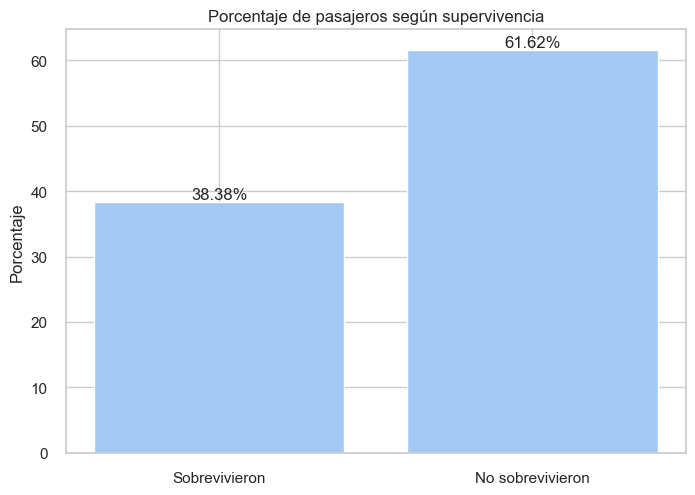

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el porcentaje de sobrevivientes y no sobrevivientes
survived_percentage = (df_titanic['Survived'].sum() / len(df_titanic)) * 100
not_survived_percentage = 100 - survived_percentage

# Crear el gráfico de barras con un solo bar
plt.bar(['Sobrevivieron', 'No sobrevivieron'], [survived_percentage, not_survived_percentage])

# Agregar etiquetas porcentuales a cada barra
for i, percentage in enumerate([survived_percentage, not_survived_percentage]):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.ylabel('Porcentaje')
plt.title('Porcentaje de pasajeros según supervivencia')
plt.show()

**Análisis:**

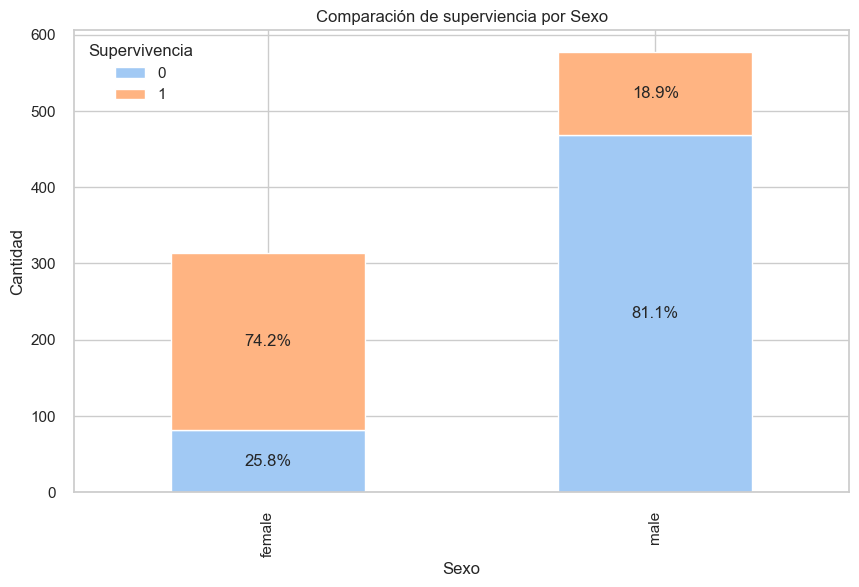

In [300]:
grouped_data = df_titanic.groupby(['Sex', 'Survived']).size().unstack()

percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Comparación de superviencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
    ax.bar_label(container, labels=labels, label_type='center')

# Mostrar el gráfico
plt.show()

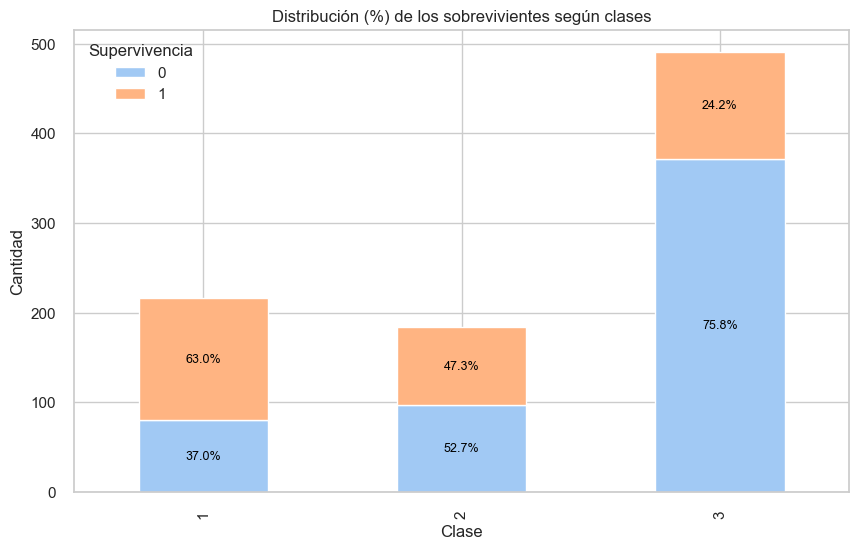

In [301]:
# Agrupar por clase y supervivencia y contar las ocurrencias
grouped_data = df_titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Calcular porcentajes
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Distribución (%) de los sobrevivientes según clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    # Obtener los índices del DataFrame agrupado
    index = grouped_data.index
    for i, v in enumerate(container):
        # Obtener el índice actual
        idx = index[i]
        # Obtener el valor del porcentaje correspondiente
        height = v.get_height()
        if height > 0:
            percentage = height / grouped_data.loc[idx].sum() * 100
            ax.annotate(f'{percentage:.1f}%', 
                        (v.get_x() + v.get_width() / 2, v.get_y() + height / 2),
                        ha='center', va='center', fontsize=9, color='black')

# Mostrar el gráfico
plt.show()

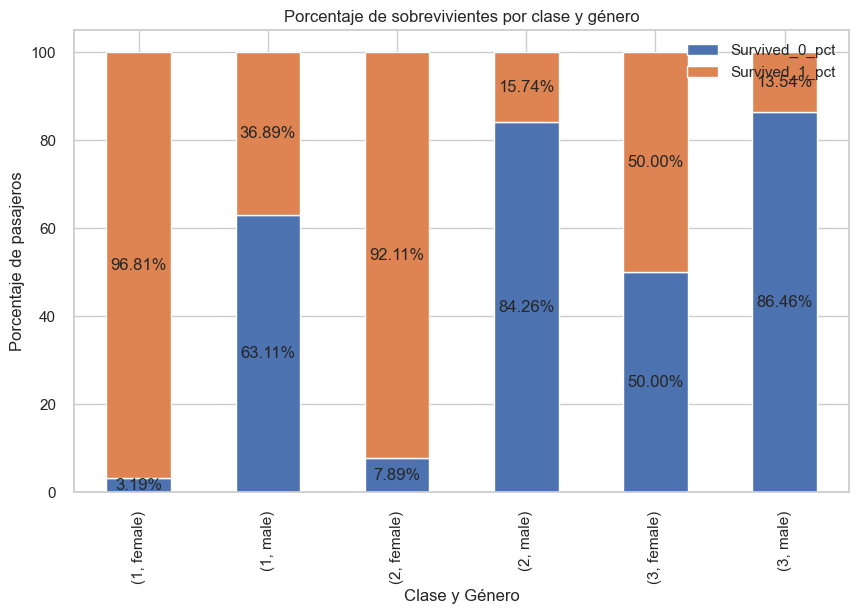

In [302]:
# Calcular la tabla de contingencia sin incluir la fila y columna 'All'
cross_tab = pd.crosstab([df_titanic.Pclass, df_titanic.Sex], df_titanic.Survived)

# Calcular los totales de pasajeros para cada grupo de Pclass y Sex
total_pasajeros_grupo = cross_tab.sum(axis=1)

# Crear una tabla que muestre los totales de pasajeros y los sobrevivientes y no sobrevivientes para cada grupo
tabla_pasajeros = pd.concat([total_pasajeros_grupo, cross_tab], axis=1)
tabla_pasajeros.columns = ['Total', 'Survived_0', 'Survived_1']

# Calcular los porcentajes de sobrevivencia para cada grupo
tabla_pasajeros['Survived_0_pct'] = (tabla_pasajeros['Survived_0'] / tabla_pasajeros['Total']) * 100
tabla_pasajeros['Survived_1_pct'] = (tabla_pasajeros['Survived_1'] / tabla_pasajeros['Total']) * 100

# Definir colores personalizados
colores = ['#4C72B0', '#DD8452']  # Azul oscuro y naranja oscuro

# Graficar los porcentajes de sobrevivencia
sns.set(style="whitegrid")
ax = tabla_pasajeros[['Survived_0_pct', 'Survived_1_pct']].plot(kind='bar', stacked=True, color=colores, figsize=(10, 6))

# Agregar etiquetas de porcentaje para cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*0.5), ha='center', va='center')

# Configuración del gráfico
plt.title('Porcentaje de sobrevivientes por clase y género')
plt.xlabel('Clase y Género')
plt.ylabel('Porcentaje de pasajeros')

# Mostrar el gráfico
plt.show()

**Análisis del comportamiento de la tasa de supervivencia según la clase**

In [303]:
pd.crosstab(df_titanic.Pclass, df_titanic.Survived, margins=True).style.background_gradient(cmap='plasma')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [304]:
print("Porcentaje de pasajeros sobrevivientes según clase") 

print("Clase 1 - Alta : ", df_titanic.Survived[df_titanic.Pclass == 1].sum()/df_titanic[df_titanic.Pclass == 1].Survived.count())
print("Clase 2 - Media: ", df_titanic.Survived[df_titanic.Pclass == 2].sum()/df_titanic[df_titanic.Pclass == 2].Survived.count())
print("Clase 3 - Baja : ", df_titanic.Survived[df_titanic.Pclass == 3].sum()/df_titanic[df_titanic.Pclass == 3].Survived.count())

Porcentaje de pasajeros sobrevivientes según clase
Clase 1 - Alta :  0.6296296296296297
Clase 2 - Media:  0.47282608695652173
Clase 3 - Baja :  0.24236252545824846


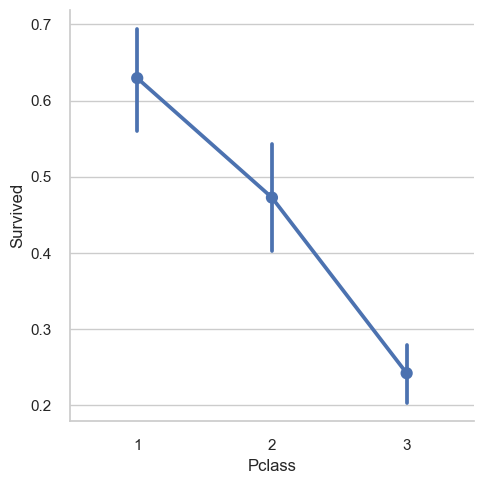

In [305]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=df_titanic)
plt.show()

**Análisis:**

**Análisis de la Tasa de Supervivencia según Punto de Embarque**

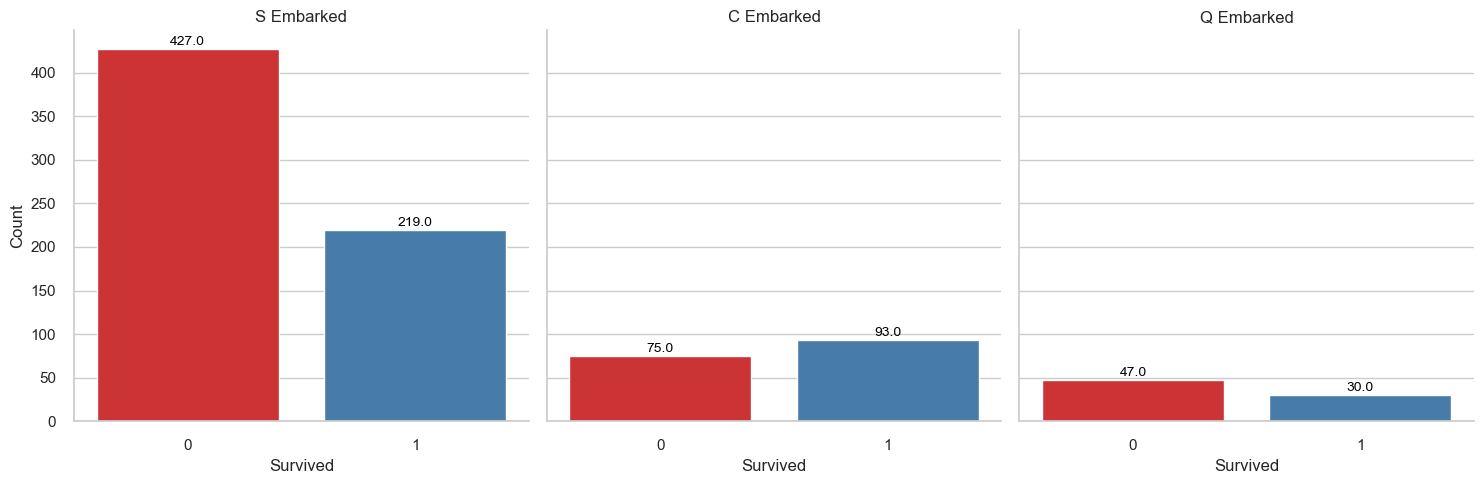

In [306]:
# Configurar el estilo y los colores
sns.set(style="whitegrid", palette="pastel")

# Crear el gráfico con barras de colores distintos para cada categoría de Embarked
g = sns.catplot(x='Survived', col='Embarked', kind='count', data=df_titanic, palette='Set1')

# Ajustar las etiquetas
g.set_axis_labels("Survived", "Count")
g.set_titles("{col_name} Embarked")

# Añadir etiquetas con la cantidad de registros en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Mostrar el gráfico
plt.show()

Estos códigos representan los puertos de embarque respectivos de los pasajeros en el Titanic. Cada pasajero fue registrado con el puerto de donde embarcó en su viaje.
- C: Cherbourg
- Q: Queenstown
- S: Southampton

**Análisis según Punto de Embarque y Sexo**

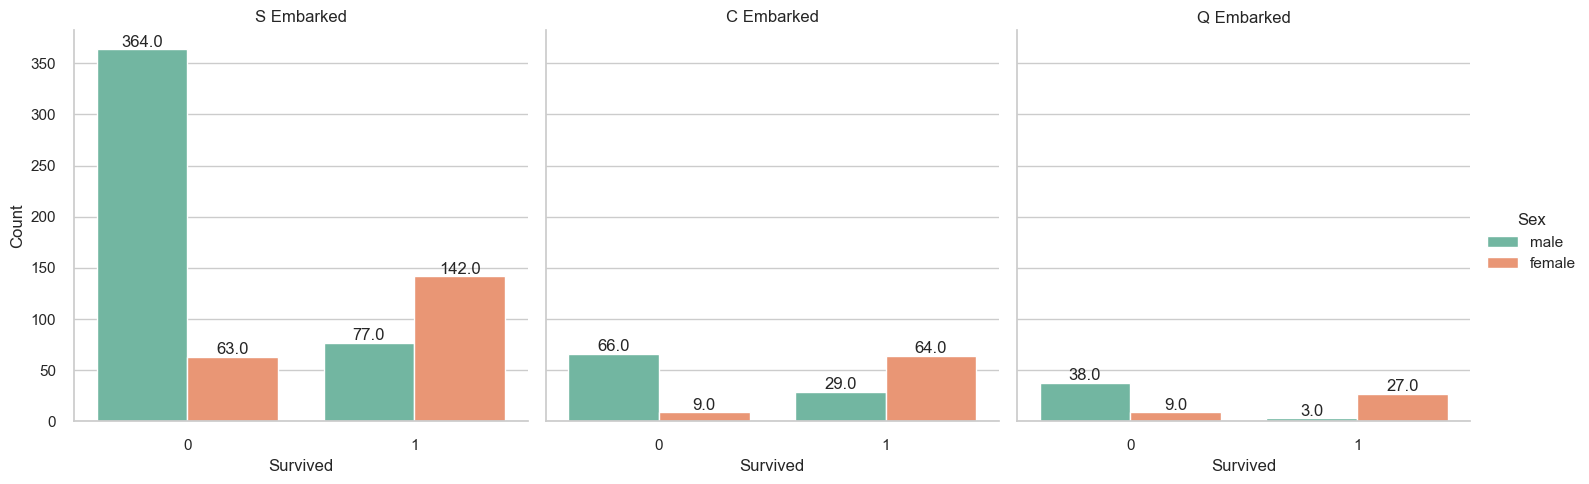

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo y los colores
sns.set(style="whitegrid", palette="pastel")

# Crear el gráfico con segmentación por sexo
g = sns.catplot(x='Survived', col='Embarked', hue='Sex', kind='count', data=df_titanic, palette='Set2')

# Ajustar las etiquetas
g.set_axis_labels("Survived", "Count")
g.set_titles("{col_name} Embarked")

# Agregar etiquetas de recuento en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostrar el gráfico
plt.show()


**Análisis de la Tasa de Supervivencia según punto de Embarque**

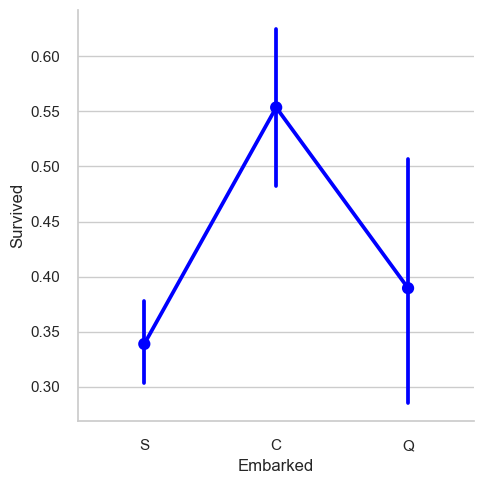

In [308]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=df_titanic, color='blue')


plt.show()

**Análisis:**

A pesar de que S fue el embarque más grande, no tuvo la tasa de sobrevivencia mayor, sino que fue el embarque C en Cherboug.
Pareciera que existe algun tipo de correlación entre la tasa de sobrevivientes y el embarque, al menos se puede ver una tendencia y también se nota que justo este embarque fue el que tuvo una mayor población femenina vs las otras.

**Análisis de supervivencia según grupos de edad**

  Age_group  Range  Count
0   Grupo A    0-9     64
1   Grupo B  10-19    115
2   Grupo C  20-29    407
3   Grupo D  30-39    155
4   Grupo E  40-49     86
5   Grupo F  50-59     42
6   Grupo G  60-69     17
7   Grupo H  70-79      5


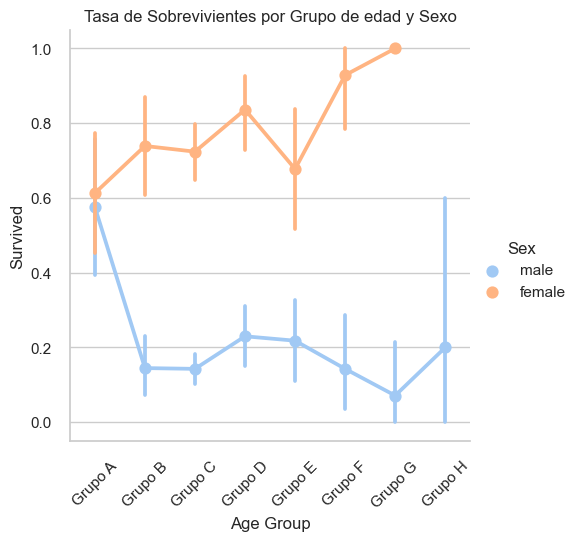

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crear grupos de edad
for df in [df_titanic]:
    df['Age_group'] = np.nan
    for i, group_name in enumerate(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E', 'Grupo F', 'Grupo G', 'Grupo H'], 0):
        df.loc[(df['Age'] <= (i+1) * 10) & (df['Age_group'].isna()), 'Age_group'] = group_name

# Calcular la cantidad de personas en cada grupo
age_group_counts = df_titanic['Age_group'].value_counts().sort_index()

# Crear un DataFrame con los rangos de edad y la cantidad de personas en cada grupo
age_group_info = pd.DataFrame({
    'Age_group': age_group_counts.index,
    'Range': [f'{i*10}-{(i+1)*10-1}' for i in range(len(age_group_counts))],
    'Count': age_group_counts.values
})

# Mostrar la tabla
print(age_group_info)

# Crear el gráfico
sns.catplot(x='Age_group', y='Survived', hue='Sex', kind='point', data=df_titanic, order=['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E', 'Grupo F', 'Grupo G', 'Grupo H'])



# Ajustar las etiquetas
plt.xlabel('Age Group')
plt.ylabel('Survived')
plt.title('Tasa de Sobrevivientes por Grupo de edad y Sexo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

**Análisis:**

Se realizó una agrupación por rangos de edad (10 años) para poder evaluar la tasa de sobrevivientes por cada rango de edad y sexo. De esto se pudo analizar que en infantes el indice de supervivencia fue casi el mismo, lo que tiene sentido dado que la prioridad de evacuación eran mujeres y niños y en los niños no fue tenido en cuenta su sexo para el protocolo.

En la población adulta si es distinto, ya que se nota una clara diferencia entre el sexo femenino y masculino y su tasa de sobrevivientes

#### **Preparación de los Datos**

In [310]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Age_group    891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Definición de los conjuntos de prueba y entrenamiento**

In [311]:
df_train_models = df_titanic.copy()
df_test_models = data_test_merged.copy()

In [312]:
df_train_models.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Grupo C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Grupo D
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Grupo C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Grupo D
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Grupo D


In [313]:
df_test_models.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Se lleva a cabo el proceso de transformación de las variables categóricas a numéricas en el **conjunto de entrenamiento**, para posteriormente empezar a trabajar los modelos de aprendizaje automático.

In [314]:
df_train_models = pd.get_dummies(df_train_models, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_models.drop(['PassengerId','Name','Ticket','Age_group'],axis=1,inplace=True)
df_train_models.dropna(inplace=True)

In [315]:
# Convertir la columna booleana a tipo de dato entero (0 para False, 1 para True)
df_train_models['Sex_male'] = df_train_models['Sex_male'].astype(int)
df_train_models['Embarked_Q'] = df_train_models['Embarked_Q'].astype(int)
df_train_models['Embarked_S'] = df_train_models['Embarked_S'].astype(int)
df_train_models['Pclass_2'] = df_train_models['Pclass_2'].astype(int)
df_train_models['Pclass_3'] = df_train_models['Pclass_3'].astype(int)

In [316]:
df_train_models.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Se lleva a cabo el proceso de transformación de las variables categóricas a numéricas en el **conjunto de prueba**, para posteriormente empezar a trabajar los modelos de aprendizaje automático.

In [317]:
df_test_models = pd.get_dummies(df_test_models, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_models.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df_test_models['Age'].fillna(df_test_models['Age'].median(), inplace=True)
df_test_models['Fare'].fillna(df_test_models['Fare'].median(), inplace=True)

In [318]:
df_test_models.head(5)

,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,True,True,False,False,True
1,47.0,1,0,7.0000,1,False,False,True,False,True
2,62.0,0,0,9.6875,0,True,True,False,True,False
3,27.0,0,0,8.6625,0,True,False,True,False,True
4,22.0,1,1,12.2875,1,False,False,True,False,True


In [319]:
# Convertir la columna booleana a tipo de dato entero (0 para False, 1 para True)
df_test_models['Sex_male'] = df_test_models['Sex_male'].astype(int)
df_test_models['Embarked_Q'] = df_test_models['Embarked_Q'].astype(int)
df_test_models['Embarked_S'] = df_test_models['Embarked_S'].astype(int)
df_test_models['Pclass_2'] = df_test_models['Pclass_2'].astype(int)
df_test_models['Pclass_3'] = df_test_models['Pclass_3'].astype(int)

# Obtener la columna 'Survived' del DataFrame de prueba
survived_column = df_test_models['Survived']

# Eliminar la columna 'Survived' del DataFrame de prueba
df_test_models.drop('Survived', axis=1, inplace=True)

# Insertar la columna 'Survived' al principio del DataFrame de prueba
df_test_models.insert(0, 'Survived', survived_column)

In [320]:
len(df_test_models)

418

In [321]:
df_test_models.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1


# KNN

In [322]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [323]:
train_raw = df_train_models.copy()
test_raw = df_test_models.copy()

In [324]:
train_raw.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Standardize

In [325]:
# train
train_features = train_raw.drop('Survived', axis=1)
train_labels = train_raw['Survived']

# test
test_features = test_raw.drop('Survived', axis=1) 
test_labels = test_raw['Survived']

scaler = StandardScaler()

train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

train_features_standarized = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_standarized = pd.concat([train_features_standarized, train_labels], axis=1)

test_features_standarized = pd.DataFrame(test_features_scaled, columns=test_features.columns)
test_standarized = pd.concat([test_features_standarized, test_labels], axis=1)


## Select best K

In [326]:
# Split the training data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(train_features_scaled, train_labels, test_size=0.2, random_state=42)

#Train the KNN model with different values of k.

# Define the range of k values to test.
k_range = range(1, 31)
train_errors = []
val_errors = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Training error
    y_train_pred = knn.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    
    # Validation error
    y_val_pred = knn.predict(X_val)
    val_errors.append(mean_squared_error(y_val, y_val_pred))


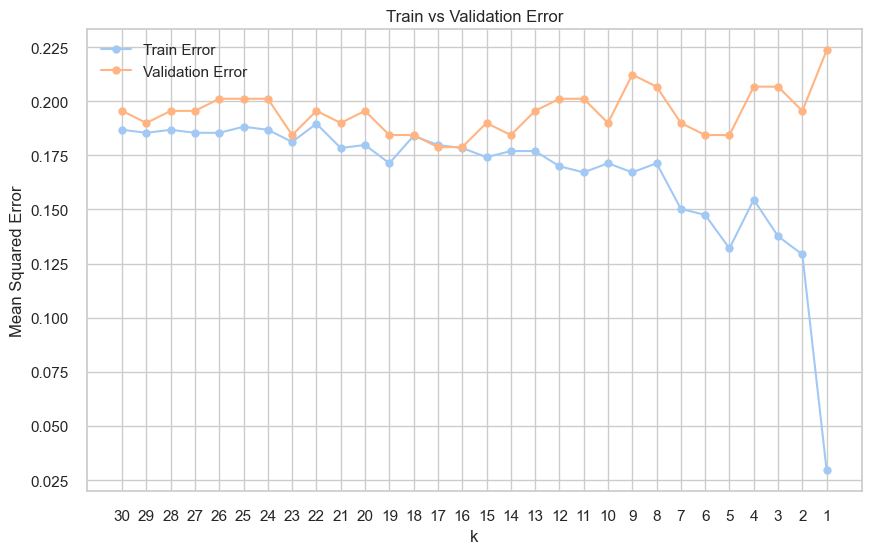

In [327]:
# plot results
plt.figure(figsize=(10, 6))
plt.plot(k_range[::-1], train_errors[::-1], label='Train Error', marker='o')
plt.plot(k_range[::-1], val_errors[::-1], label='Validation Error', marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Validation Error')
plt.legend()
plt.xticks(ticks=k_range[::-1], labels=k_range[::-1])  # Ensure k values are shown from 30 to 1
plt.gca().invert_xaxis()
plt.show()


In [328]:
best_k = k_range[val_errors.index(min(val_errors))]
print(f'The best value of k is: {best_k}')

The best value of k is: 16


## Cross-Validation Protocols

In [329]:
# Model
knn = KNeighborsClassifier(n_neighbors=best_k)

In [330]:
# 5-Fold Cross-Validation
cv_5_scores = cross_val_score(knn, train_features_scaled, train_labels, cv=5, scoring='accuracy')
print(f'5-Fold Cross-Validation Accuracy: {cv_5_scores.mean()}')

5-Fold Cross-Validation Accuracy: 0.799114933149206


In [331]:
# 10-Fold Cross-Validation
cv_10_scores = cross_val_score(knn, train_features_scaled, train_labels, cv=10, scoring='accuracy')
print(f'10-Fold Cross-Validation Accuracy: {cv_10_scores.mean()}')

10-Fold Cross-Validation Accuracy: 0.8103495630461921


## Fit the model

In [332]:
knn.fit(train_features_scaled, train_labels)

KNeighborsClassifier(n_neighbors=16)

In [333]:
# Predict on the validation set
y_val_pred = knn.predict(X_val)

In [334]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[97  8]
 [22 52]]


In [335]:
class_report = classification_report(y_val, y_val_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



## Predict on Test set

In [336]:
test_predictions = knn.predict(test_features_scaled)

In [337]:
conf_matrix = confusion_matrix(test_labels, test_predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[255  11]
 [ 40 112]]


In [338]:
KNN_class_report = classification_report(test_labels, test_predictions)
print(f'Classification Report:\n{KNN_class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       266
           1       0.91      0.74      0.81       152

    accuracy                           0.88       418
   macro avg       0.89      0.85      0.86       418
weighted avg       0.88      0.88      0.87       418



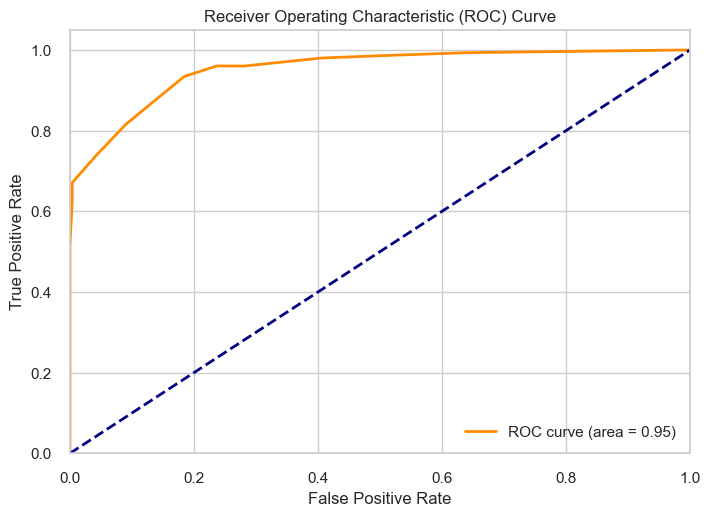

In [339]:
# Compute ROC curve and ROC area
test_probabilities = knn.predict_proba(test_features_scaled)[:, 1] 
fpr, tpr, _ = roc_curve(test_labels, test_probabilities)
roc_auc = roc_auc_score(test_labels, test_probabilities)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

El modelo KNN demuestra un rendimiento robusto con una precisión general del 87%. Funciona particularmente bien en la identificación de pasajeros que no sobrevivieron, con alta precisión y recall. Sin embargo, hay margen de mejora en la identificación de pasajeros que sobrevivieron, como lo indica el menor recall para esta clase. La alta precisión y los F1-scores equilibrados sugieren que el modelo es confiable y adecuado para esta tarea de clasificación, pero se podrían explorar ajustes adicionales o modelos alternativos para mejorar el recall de la clase de sobrevivientes.

# Random forest

In [340]:
train_raw = df_train_models.copy()
test_raw = df_test_models.copy()

In [341]:
from sklearn.preprocessing import MinMaxScaler

# Creamos el objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizamos las variables 'Age' y 'Fare' en train_raw
train_raw[['Age', 'Fare']] = scaler.fit_transform(train_raw[['Age', 'Fare']])

# Normalizamos las variables 'Age' y 'Fare' en test_raw
test_raw[['Age', 'Fare']] = scaler.transform(test_raw[['Age', 'Fare']])

In [342]:
train_raw.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0.271174,1,0,0.014151,1,0,1,0,1
1,1,0.472229,1,0,0.139136,0,0,0,0,0
2,1,0.321438,0,0,0.015469,0,0,1,0,1
3,1,0.434531,1,0,0.103644,0,0,1,0,0
4,0,0.434531,0,0,0.015713,1,0,1,0,1


In [343]:
test_raw.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,0.428248,0,0,0.015282,1,1,0,0,1
1,1,0.585323,1,0,0.013663,0,0,1,0,1
2,0,0.773813,0,0,0.018909,1,1,0,1,0
3,0,0.334004,0,0,0.016908,1,0,1,0,1
4,1,0.271174,1,1,0.023984,0,0,1,0,1


In [344]:
# Obtener los títulos de las columnas de train_raw y test_raw
columnas_train = train_raw.columns.tolist()
columnas_test = test_raw.columns.tolist()

# Verificar si los títulos de las columnas son iguales
if columnas_train == columnas_test:
    print("Los títulos de las columnas son iguales en train_raw y test_raw.")
else:
    print("Los títulos de las columnas son diferentes en train_raw y test_raw.")

Los títulos de las columnas son iguales en train_raw y test_raw.


In [345]:
# Paso 1: Dividir los datos de entrenamiento en características (X_train) y la variable objetivo (y_train)
X_train = train_raw.drop('Survived', axis=1)
y_train = train_raw['Survived']

### Modelo Random Forest Básico sin busqueda de optimización


In [346]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Paso 2: Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Paso 3: Instanciar un clasificador Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Paso 4: Ajustar el clasificador a los datos de entrenamiento
clf.fit(X_train, y_train)

# Paso 5: Evaluar el rendimiento del modelo en los datos de validación
y_pred_val = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy del modelo Random Forest en los datos de validación:", accuracy_val)

Accuracy del modelo Random Forest en los datos de validación: 0.8156424581005587


Accuracy del modelo: 0.8444976076555024


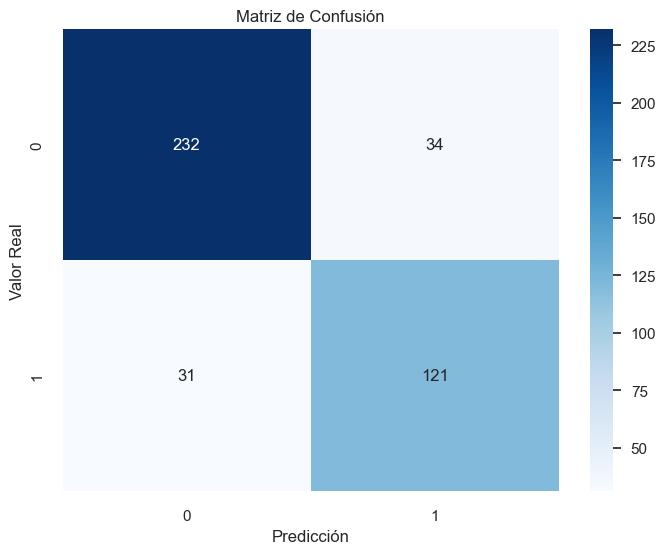

In [347]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos de prueba en características (X_test) y variable objetivo (y_test)
X_test = test_raw.drop('Survived', axis=1)  # Quita la columna 'Survived' para obtener las características
y_test = test_raw['Survived']  # La columna 'Survived' es la variable objetivo

# Paso 4: Hacer predicciones en los datos de prueba
predicciones_test_base = clf.predict(X_test)

# Paso 5: Calcular el accuracy
accuracy = accuracy_score(y_test, predicciones_test_base)
print("Accuracy del modelo:", accuracy)

# Paso 6: Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones_test_base)

# Paso 7: Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()

### Análisis:

Lo que se puede observar es que el modelo random forest utilizado con todos sus parámetros by default logra unos buenos resutlados, logrando un accuracy del modelo del 84%. Sin embargo, siguiendo el objetivo del proyecto se considero necesario explorar un protocolo da validación que permita encontrar algunos hiperparámetros óptimos que permitan lograr un mejor modelo más optimizado

### Búsqueda de mejores parámetros (utilizando Cross Validation)

Los parámetros más relevantes del modelo Random Forest son:

- n_estimators: El número de árboles en el bosque.
- max_depth: La profundidad máxima de cada árbol.
- max_features: El número máximo de características a considerar al dividir un nodo.
- min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno.
- min_samples_leaf: El número mínimo de muestras requeridas para estar en un nodo hoja.
- bootstrap: Si se debe o no utilizar el método de bootstrapping para construir árboles.

Optimizar los hiperparámetros del modelo es fundamental para obtener un rendimiento óptimo del algoritmo. Sin embargo, es común centrarse en algunos hiperparámetros clave, como n_estimators, max_depth y max_features, debido a que:

- n_estimators: Como se mencionó antes, este hiperparámetro determina la cantidad de árboles en el bosque. Al aumentar el número de árboles generalmente mejora el rendimiento del modelo, hasta cierto punto, ya que reduce el riesgo de generar algún sobreajuste (overfitting). Sin embargo, más árboles también significan un tiempo de entrenamiento más largo y un mayor consumo de recursos computacionales. Por lo tanto, es importante encontrar un equilibrio entre el rendimiento del modelo y la eficiencia computacional.

- max_depth: Esto hace referencia a la profundidad máxima de cada árbol, lo que controla la complejidad del modelo. Los árboles de mayor profundidad pueden capturar relaciones más complejas en los datos (disminuyendo el sesgo), pero también tienen más probabilidades de generar overfitting. Es por eso que, es importante limitar la profundidad máxima de los árboles para ayuda a prevenir el overfitting y mejorar la generalización del modelo.

- max_features: Este hiperparámetro determina el número máximo de características a considerar al dividir un nodo. Por lo tanto, al limitar el número de características se puede ayudar a reducir la correlación entre los árboles en el bosque y mejorar la diversidad del conjunto de árboles, lo que puede conducir a un mejor rendimiento general del modelo.

Por lo tanto, para este ejercicio se optó por optimizar estos 3 hiperparámetros. Para ello, se optó por el uso del protocolo de validación cruzada (Cross Validation) para la selección de hiperparámetros al ser una estrategia efectiva para desarrollar modelos más robustos y generalizables, ya que proporciona una evaluación más precisa del rendimiento del modelo y ayuda a evitar el sobreajuste.

- Generalización del modelo: Al usar CV, se divide el conjunto de datos en múltiples conjuntos de entrenamiento y validación. Esto permite evaluar el rendimiento del modelo en múltiples divisiones de los datos y proporciona una estimación más precisa de cómo se comportará el modelo con datos nuevos y no vistos. En resumen, CV ayuda a garantizar que el modelo sea generalizable y no esté sobreajustado a un conjunto de datos específico.

- Selección de hiperparámetros robusta: Al buscar los mejores hiperparámetros mediante CV, se evalúa cómo el rendimiento del modelo varía con diferentes combinaciones de hiperparámetros en múltiples divisiones de los datos. Esto ayuda a encontrar una configuración de hiperparámetros que funcione bien de manera consistente en diferentes subconjuntos de datos.

- Reducción del riesgo del overfitting: el CV reduce el riesgo de overfitting al conjunto de datos de entrenamiento porque el modelo se evalúa en datos no vistos en cada iteración. Esto ayuda a seleccionar hiperparámetros que generalicen bien a nuevos datos y no estén demasiado ajustados al conjunto de entrenamiento.

In [348]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instanciar el clasificador Random Forest
rfc = RandomForestClassifier(random_state=42)

# Definir los parámetros a probar
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 50],
    'max_depth': [None, 2, 3, 5, 7],
    'max_features': [2, 3, 5, 7, 9]
}

# Instanciar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar la búsqueda de cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

best_model = grid_search.best_estimator_

Mejores parámetros: {'max_depth': 5, 'max_features': 7, 'n_estimators': 25}


## Modelo Random Forest optimizado

In [349]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Instanciar el clasificador Random Forest con los mejores parámetros
best_params = {'max_depth': 5, 'max_features': 7, 'n_estimators': 25}
best_model = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Calcular y mostrar el accuracy del modelo en los datos de entrenamiento (si lo deseas)
train_predicciones = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predicciones)
print("Accuracy del modelo en los datos de entrenamiento:", train_accuracy)


Accuracy del modelo en los datos de entrenamiento: 0.8679775280898876


Accuracy del modelo: 0.9234449760765551


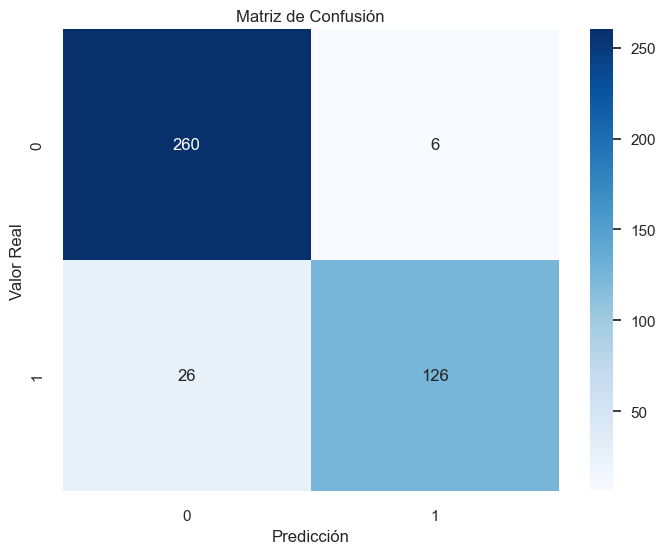

In [350]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el conjunto de datos de prueba en características (X_test) y variable objetivo (y_test)
X_test = test_raw.drop('Survived', axis=1)  # Quita la columna 'Survived' para obtener las características
y_test = test_raw['Survived']  # La columna 'Survived' es la variable objetivo

# Hacer predicciones en los datos de prueba
predicciones_test = best_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, predicciones_test)
print("Accuracy del modelo:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones_test)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar el mapa de calor
plt.show()

In [351]:
from sklearn.metrics import classification_report

# Generar un reporte de métricas
RANDOM_FOREST_report = classification_report(y_test, predicciones_test)

# Imprimir el reporte
print("Reporte de Métricas del Modelo de Random Forest optimizado:\n")
print(RANDOM_FOREST_report)

Reporte de Métricas del Modelo de Random Forest optimizado:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       266
           1       0.95      0.83      0.89       152

    accuracy                           0.92       418
   macro avg       0.93      0.90      0.91       418
weighted avg       0.93      0.92      0.92       418



### Análisis del modelo:

#### Precision: 
La precisión es la proporción de predicciones positivas que fueron correctas. En este caso, para la clase 0 (es decir, "no sobrevive") fue del 92%, lo que significa que el 92% de las predicciones de no sobreviviente fueron correctas. Para la clase 1 (es decir, "sobrevive"), la precisión es del 95%, lo que indica que el 95% de las predicciones de sobrevivir fueron correctas.

#### Recall: 
El recall (también es conocido como sensibilidad) es la proporción de instancias positivas que fueron correctamente clasificadas por el modelo. En este caso, el recall para no sobrevivir es del 97%, lo que indica que el 97% de las instancias de no sobrevivir fueron correctamente identificadas por el modelo. Para el hecho de sobrevivir, el recall es del 86%, lo que significa que el 86% de las instancias de sobrevivir fueron correctamente identificadas por el modelo.

#### F1-score: 
El F1-score es una medida que combina tanto la precisión como el recall en un solo número. Es útil cuando las clases están desequilibradas. En este caso, el F1-score para no sobrevivir es del 94%, y para sobrevivir es del 90%.

#### Accuracy: 
La precisión global del modelo, es la proporción de predicciones correctas sobre todas las predicciones realizadas. En este caso, la precisión global del modelo es del 93%, lo que significa que el 93% de todas las predicciones realizadas fueron correctas.

#### Support: 
Hace referencia a la cantidad de muestras de cada clase en el conjunto de datos de prueba. En este caso, hay 204 muestras de la clase 0 (no sobrevivir) y 127 muestras de la clase 1 (sobrevivir).

En resumen, el modelo de Random Forest optimizado tiene un buen rendimiento en términos de precisión, recall y F1-score para ambas clases (sobrevivir y no sobrevivir), así como una alta precisión global (accuracy). Sin embargo, puede haber cierto desequilibrio entre la precisión y el recall para la clase 1 (es decir para sobrevivir), lo que puede indicar que el modelo tiene más dificultades para identificar correctamente las instancias de esa clase en comparación con la clase 0 (es decir no sobrevivir).

Con base en lo anterior, también se observa en la matriz de confusión que el modelo es muy acertado al momento de predecir la supervivencia de los pasajeros del titanic. Los valores reales de la clase 0 (es decir no sobrevivir) que predijo bien como 0 fueron 198 vs los que predijo mal como 1 que fueron tan solo 6. Algo parecido sucede con los valores reales de la clase 1 (es decir sobrevivir) que predijo bien como 1 fueron 109 vs los que predijo mal como 0 que fueron solo 18.

Por lo que, se puede decir que el modelo puede llegar a ser más exacto para predecir no supervivencia, aunque es bastante bueno para predecir ambos tanto supervencia como no supervivencia en el titanic.

# XGBOOST

In [352]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [353]:
# Definir el modelo XGBoost
model = xgb.XGBClassifier()

### SELECCIÓN DE HIPERPARÁMETROS

In [354]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

### EXPLICACIÓN DE LOS RANGOS DE LOS HIPERPARÁMETROS DE PRUEBA

##### n_estimators: [50, 100, 200]

###### Razonamiento: Este parámetro controla el número de árboles en el modelo. Menos árboles pueden llevar a un modelo infraajustado, mientras que demasiados pueden llevar a un sobreajuste y aumentar el tiempo de entrenamiento. Los valores de 50, 100 y 200 son comunes para empezar, ya que proporcionan un buen balance entre capacidad de generalización y tiempo de entrenamiento.

##### learning_rate: [0.01, 0.1, 0.2]

###### Razonamiento: El learning rate (o tasa de aprendizaje) controla el tamaño de los pasos que se dan hacia el mínimo de la función de pérdida. Valores bajos como 0.01 tienden a hacer que el modelo sea más robusto, pero requieren más árboles para converger. Valores intermedios como 0.1 son típicamente buenos puntos de partida.

##### max_depth: [3, 4, 5]

###### Razonamiento: Este parámetro determina la profundidad máxima de los árboles. Valores bajos ayudan a prevenir el sobreajuste. En la práctica, profundidades entre 3 y 6 son comunes para evitar sobreajuste mientras se captura suficiente complejidad del modelo.

##### min_child_weight: [1, 2, 3]

###### Razonamiento: Este parámetro especifica el peso mínimo de la suma de instancias de un nodo hijo. Valores bajos pueden hacer el modelo más complejo, permitiendo nodos con menos instancias, mientras que valores más altos lo simplifican. Los valores 1, 2 y 3 son buenos puntos de partida para equilibrar complejidad y generalización.

##### subsample: [0.8, 1.0]

###### Razonamiento: Este parámetro controla la fracción de muestras utilizadas para entrenar cada árbol. Usar una fracción menor a 1.0 (por ejemplo, 0.8) puede ayudar a prevenir sobreajuste. 1.0 significa que se usan todas las muestras.

##### colsample_bytree: [0.8, 1.0]

###### Razonamiento: Este parámetro controla la fracción de características (columnas) a considerar en cada árbol. Valores menores a 1.0 pueden ayudar a prevenir el sobreajuste. Valores comunes son 0.8 y 1.0.

### CROSS VALIDATION

In [355]:
# Definir el Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
"""
Como se tiene un conjunto de datos relativamente pequeño, un valor de k más alto puede ser mejor 
para reducir la variabilidad de la estimación del rendimiento del modelo. Razón por la que se elige 10 y no 5 folds
"""

'\nComo se tiene un conjunto de datos relativamente pequeño, un valor de k más alto puede ser mejor \npara reducir la variabilidad de la estimación del rendimiento del modelo. Razón por la que se elige 10 y no 5 folds\n'

### BÚSQUEDA DE LOS HIPERPARÁMETROS

In [356]:
# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, verbose=1, n_jobs=-1)

#### SEPARAR X, Y

In [357]:
X_train = df_train_models.drop(columns='Survived')
y_train = df_train_models['Survived']

#### ESTANDARIZAR

In [358]:
from sklearn.preprocessing import StandardScaler
# Estandarizar las características
# Estandarizar solo dos columnas específicas, por ejemplo, 'Age' y 'Fare'
columns_to_scale = ['Age', 'Fare']

scaler = StandardScaler()
X_train_scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

# Crear DataFrames con las columnas estandarizadas
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = X_train_scaled_columns

In [359]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     in...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [360]:
# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 1.0}


In [361]:
# Mostrar el rendimiento de cada combinación de hiperparámetros
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011359,0.003737,0.002254,0.001634,0.8,0.01,3,1,50,0.8,...,0.764045,0.842697,0.820225,0.797753,0.752809,0.707865,0.910112,0.793508,0.052669,315
1,0.007603,0.000788,0.001702,0.000993,0.8,0.01,3,1,50,1.0,...,0.775281,0.842697,0.831461,0.797753,0.752809,0.707865,0.910112,0.795755,0.052802,308
2,0.013123,0.001423,0.001617,0.000797,0.8,0.01,3,1,100,0.8,...,0.775281,0.853933,0.865169,0.797753,0.797753,0.752809,0.898876,0.815893,0.046518,275
3,0.012899,0.001666,0.001258,0.000131,0.8,0.01,3,1,100,1.0,...,0.775281,0.853933,0.887640,0.808989,0.808989,0.719101,0.898876,0.814794,0.052824,278
4,0.023781,0.003904,0.001283,0.000058,0.8,0.01,3,1,200,0.8,...,0.808989,0.865169,0.898876,0.797753,0.808989,0.764045,0.898876,0.827154,0.044741,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.009546,0.001528,0.001136,0.000103,1.0,0.2,5,3,50,1.0,...,0.831461,0.876404,0.910112,0.786517,0.831461,0.808989,0.853933,0.833908,0.035389,104
320,0.016852,0.002944,0.002525,0.002031,1.0,0.2,5,3,100,0.8,...,0.808989,0.865169,0.887640,0.797753,0.842697,0.786517,0.898876,0.836142,0.035936,70
321,0.018042,0.002797,0.001603,0.000484,1.0,0.2,5,3,100,1.0,...,0.820225,0.887640,0.898876,0.775281,0.853933,0.842697,0.865169,0.840624,0.036527,29
322,0.034029,0.004170,0.001830,0.000473,1.0,0.2,5,3,200,0.8,...,0.831461,0.898876,0.887640,0.764045,0.853933,0.786517,0.876404,0.837278,0.041435,54


### ENTRENAR EL MODELO CON LOS MEJORES HIPERPARÁMETROS

In [362]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### PREDICCIONES

In [363]:
# Separar características y etiquetas del conjunto de prueba
X_test = df_test_models.drop(columns='Survived')
y_test = df_test_models['Survived']

#### Estandarizar

In [364]:
X_test_scaled_columns = scaler.transform(X_test[columns_to_scale])
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = X_test_scaled_columns

#### Predicción

In [365]:
y_pred = best_model.predict(X_test_scaled)

#### Evaluar Modelo

In [366]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

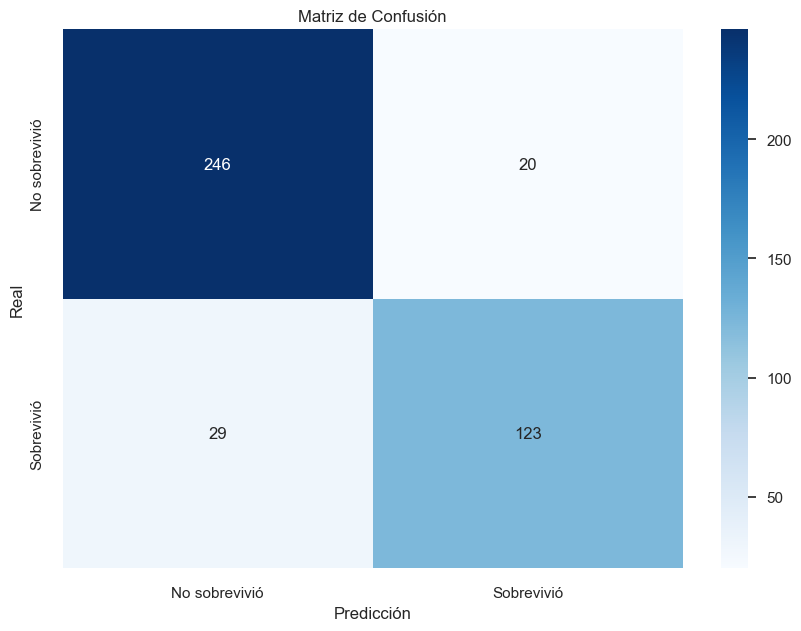

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [368]:
conf_matrix

array([[246,  20],
       [ 29, 123]])

In [369]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.8827751196172249


In [370]:
# Reporte de clasificación para obtener F1 score, recall y precision (sensibilidad)
XGBOOST_class_report = classification_report(y_test, y_pred)
print(f"Reporte de clasificación:\n{classification_report(y_test, y_pred)}")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       266
           1       0.86      0.81      0.83       152

    accuracy                           0.88       418
   macro avg       0.88      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



##### Macro avg: Promedio no ponderado (simple) de precisión, recall y F1-score para ambas clases.
##### Weighted avg: Promedio ponderado de precisión, recall y F1-score teniendo en cuenta el soporte (support) de cada clase.

#### support: Número de ocurrencias reales de cada clase en el conjunto de datos de prueba.

In [371]:
import numpy as np
# Evaluación con Cross-Validation en el conjunto de entrenamiento
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Precisión promedio de Cross-Validation en el conjunto de entrenamiento: {np.mean(cv_scores)}")

Precisión promedio de Cross-Validation en el conjunto de entrenamiento: 0.8484644194756553


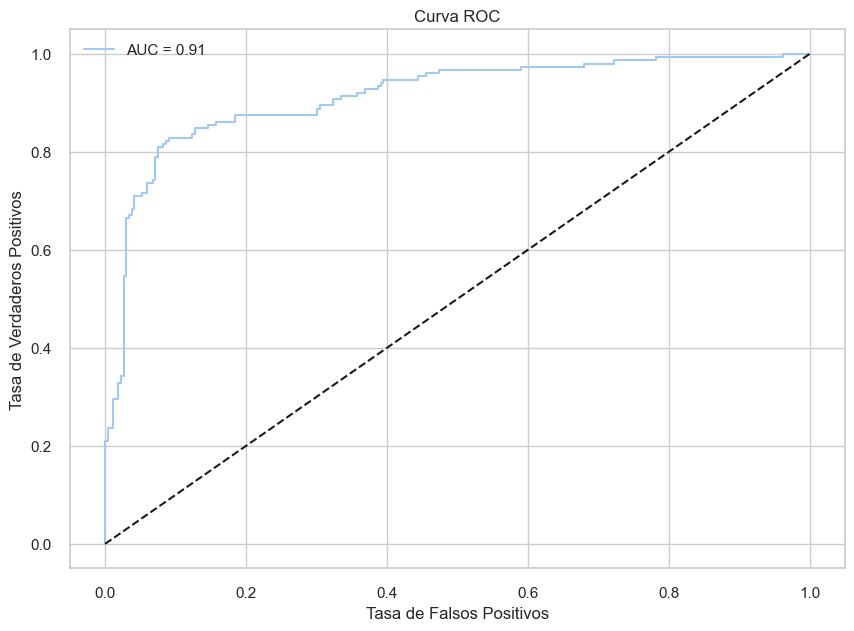

In [372]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


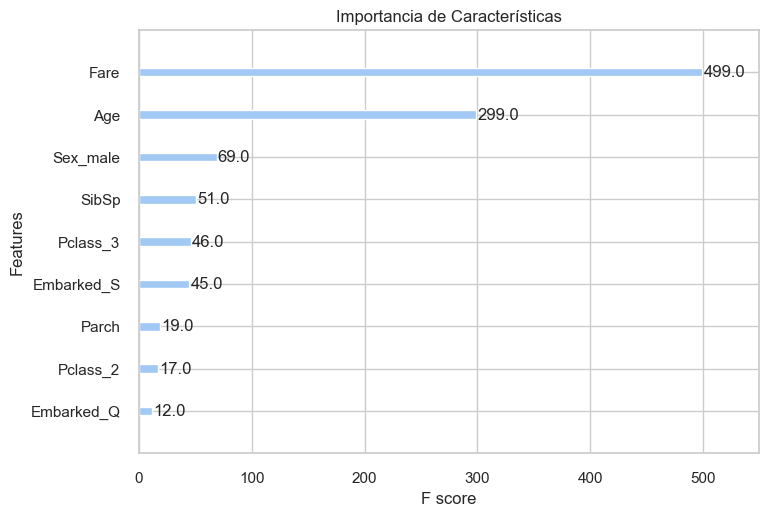

In [373]:
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Importancia de Características')
plt.show()

##### Se ha obtenido un buen rendimiento del modelo, especialmente detectando no sobrevivientes. Adicional a esto, el algoritmo de XGBoost, nos sirve para identificar la importancia de las variables, mostrando que Fare (precio que pagaron por ticket) es la característica más importante, y se relaciona a que la mayoría de sobrevivientes eran de primera clase. Y las variables PClass como están relacionadas al valor del ticket, realmente no aportan nueva información, por eso las variables tienen menor importancia.
#### Seguido está la edad, 

In [374]:
df_train_models['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [375]:
df_titanic_edad = pd.concat([df_train_models,df_test_models])

In [376]:
bins = [0, 15, 25, 49, float('inf')]
labels = ['NIÑO', 'JOVEN', 'ADULTO', 'VIEJO']

df_titanic_edad['grupo_edad'] = pd.cut(df_titanic_edad['Age'], bins=bins, labels=labels, right=False)

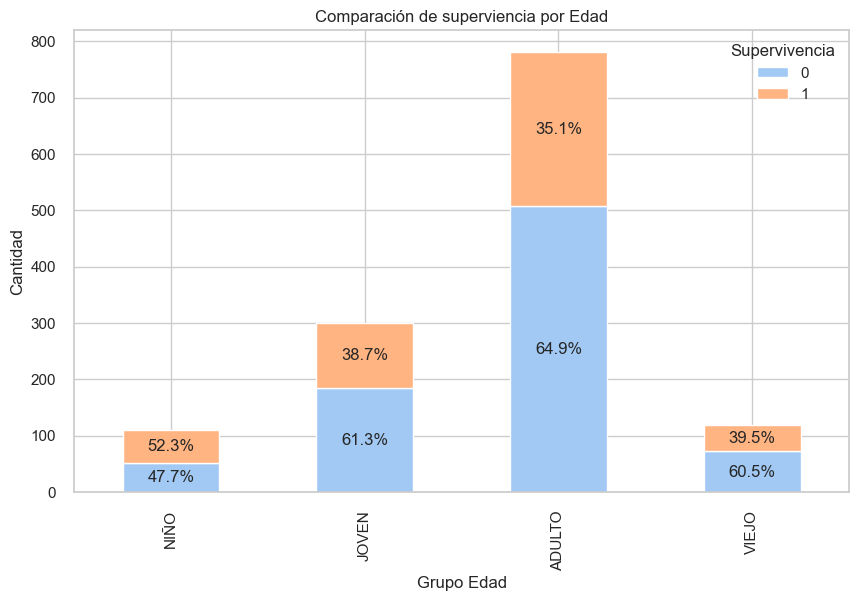

In [377]:
grouped_data = df_titanic_edad.groupby(['grupo_edad', 'Survived']).size().unstack()

percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir títulos y etiquetas
plt.title('Comparación de superviencia por Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Cantidad')
plt.legend(title='Supervivencia')

# Añadir porcentajes en las barras
for container in ax.containers:
    labels = [f'{v.get_height() / grouped_data.sum(axis=1)[i] * 100:.1f}%' if v.get_height() > 0 else '' for i, v in enumerate(container)]
    ax.bar_label(container, labels=labels, label_type='center')

# Mostrar el gráfico
plt.show()

##### Podemos ver que en los niños, hay mucha cercanía entre el número de sobrevivientes y los que no, pero en los adultos, sí vemos que que son más los que no sobreviven.

# Análisis de Componentes Principales

In [378]:
#Lectura de las librerías

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score
from collections import Counter 

import warnings
warnings.filterwarnings("ignore")


In [379]:
#Carga de la información
df_train_PCA = df_train_models.copy()
print(df_train_PCA.shape)
df_train_PCA.head(5)

(891, 10)


,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [380]:
df_train_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    int64  
 6   Embarked_Q  891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
 8   Pclass_2    891 non-null    int64  
 9   Pclass_3    891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


Teniendo en cuenta la información con la que se estimará el modelo, el siguente paso es **normalizar** los datos asociados a las variables explicativas. Es importante mencionar que el Análisis de Componentes Principales es un algoritmo que se enfoca en el cálculo de distancias entre puntos, por tanto es sensible a las diferentes escalas en las que se puedan encontrar las variables. Para esta oportunidad, se llevará a cabo el proceso para las variables Age y Fare, no es necesario normalizar las variables que ya previamente se les ha realizado alguna transformación para convertirlas en variables Dummie.  

In [381]:
# Se divide el dataset entre la variable objetivo y las características explicativas

X = df_train_PCA.drop(columns='Survived')
y = df_train_PCA['Survived']

#Identificamos las variables numéricas para proceder con la normalización

numeric_columns = ['Age', 'Fare']

#Normalización de las columnas numéricas

scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Construcción del dataset con las características normalizadas 

df_train_PCA_Norm = pd.DataFrame(X, columns=X.columns)

print(df_train_PCA_Norm)

          Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S  \
0   -0.565736      1      0 -0.502445         1           0           1   
1    0.663861      1      0  0.786845         0           0           0   
2   -0.258337      0      0 -0.488854         0           0           1   
3    0.433312      1      0  0.420730         0           0           1   
4    0.433312      0      0 -0.486337         1           0           1   
..        ...    ...    ...       ...       ...         ...         ...   
886 -0.181487      0      0 -0.386671         1           0           1   
887 -0.796286      0      0 -0.044381         0           0           1   
888 -0.104637      1      2 -0.176263         0           0           1   
889 -0.258337      0      0 -0.044381         1           0           0   
890  0.202762      0      0 -0.492378         1           1           0   

     Pclass_2  Pclass_3  
0           0         1  
1           0         0  
2           0        

In [382]:
df_train_PCA_Norm.head(5)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,-0.565736,1,0,-0.502445,1,0,1,0,1
1,0.663861,1,0,0.786845,0,0,0,0,0
2,-0.258337,0,0,-0.488854,0,0,1,0,1
3,0.433312,1,0,0.420730,0,0,1,0,0
4,0.433312,0,0,-0.486337,1,0,1,0,1


Teniendo la información normalizada, se procederá a ajustar el Análisis de Componentes Principales. En el primer paso, se crea una instancia del mismo para poder identificar tantos componentes principales como número de variables explicativas tenemos en nuestro Dataset. 

In [383]:
#Ajuste del modelo PCA

pca = PCA()

'''En esta línea ajustamos el modelo a los datos estandarizados, además, se
proyectan los datos originales en el espacio de los componentes''' 

df_proyected = pca.fit_transform(df_train_PCA_Norm)

Una vez ajustado el modelo de Componentes Principales, procedemos a identificar los pesos que cada una de las variables explicativas aporta a los componentes principales estimados.

In [384]:
loadings = pca.components_

#Para una mejor visualización, creamos un dataframe para revisar los pesos

df_loadings = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

In [385]:
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Age,-0.384482,0.589454,-0.688359,0.095519,0.121395,0.028471,-0.037557,0.046646,0.051197
SibSp,0.771284,-0.023496,-0.512362,-0.365554,-0.061488,0.061530,0.021967,-0.019333,0.001213
Parch,0.410259,0.084183,-0.031884,0.879920,0.110775,-0.100455,0.160255,-0.019738,-0.029863
Fare,0.281731,0.753563,0.491872,-0.197996,0.097681,-0.152600,-0.060126,0.171986,0.074879
Sex_male,-0.088912,-0.062217,-0.080137,-0.167489,0.078568,-0.721145,0.652762,0.013681,-0.035226
Embarked_Q,-0.011801,-0.032809,0.000439,-0.033260,0.198921,0.271961,0.213940,0.620005,-0.673772
Embarked_S,0.009422,-0.055353,-0.102944,0.082878,-0.365169,-0.571345,-0.604400,0.241097,-0.310112
Pclass_2,-0.025521,-0.002539,-0.020046,0.087047,-0.616402,0.131797,0.249213,0.562514,0.464233
Pclass_3,0.028715,-0.262737,-0.057185,-0.013444,0.632951,-0.155584,-0.263694,0.456440,0.473274


**Análisis**

* En el componente principal número 1, se identifica una carga importante de la variable "SibSp" (0.77), esto quiere decir que la cantidad de hermanos/conyugues que se encuentran en el barco está fuertemente relacionada con la varianza explicada por el primer componente.

* La característica más relevante en PC2 es "Age", al evidenciarse una carga positiva de 0.58, es decir que, la edad está estrechamente asociada con la varianza explicada por el componente en mención. Por su parte, en el PC3 esta misma característica exhibe una asociación fuerte y negativa entre la edad y el componente mencionado.

* Finalmente, se resalta que en el PC4 la carga más relevante está explicada por la variable "Parch" (0.88). Este resultado indica que la presencia o asuencia de padres/hijos dentro del barco puede influir en la forma en que se agrupan los pasajeros en términos de otras características presentes en el conjunto de datos.

Una vez teniendo la información asociada a las cargas con las cuales contribuye cada variable a cada componente principal, el siguiente paso es identicar el número de componentes necesarios para explicar el 80% de la variabilidad de la representación original de los datos. 

In [386]:
#Identificamos la varianza explicada por cada componente

explain_variance = pca.explained_variance_ratio_

In [387]:
# Se lleva a cabo el calculo de la varianza explicada acumulada

explain_variance_cumm = np.cumsum(explain_variance)

In [388]:
import numpy as np

# Identificar la varianza explicada acumulada
explain_variance_cumm = np.cumsum(explain_variance)

# Crear un DataFrame para almacenar la varianza explicada acumulada de cada componente principal
variance_df = pd.DataFrame({'Componente': [f'PC{i+1}' for i in range(len(explain_variance_cumm))],
                            'Varianza Explicada Acumulada': explain_variance_cumm})

# Encontrar el índice donde la varianza explicada acumulada alcanza o supera el 80%
indice_80_percent = np.argmax(explain_variance_cumm >= 0.8) + 1  # Sumar 1 para la numeración de los componentes

# Imprimir los resultados

print(variance_df)

# Imprimir donde se acumula el 80% de la varianza explicada
print("\nEl número de componentes principales necesarios para conservar al menos el 80% de la representación original es: ", indice_80_percent)


  Componente  Varianza Explicada Acumulada
0        PC1                      0.337397
1        PC2                      0.583220
2        PC3                      0.734907
3        PC4                      0.831597
4        PC5                      0.896687
5        PC6                      0.945514
6        PC7                      0.979820
7        PC8                      0.991678
8        PC9                      1.000000

El número de componentes principales necesarios para conservar al menos el 80% de la representación original es:  4


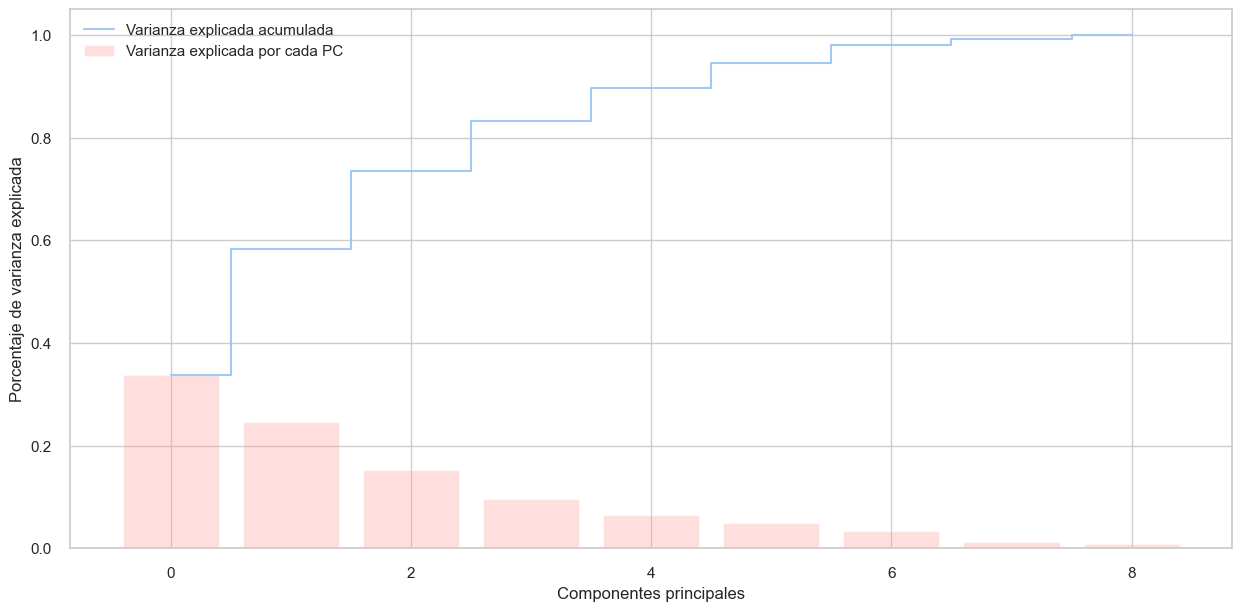

In [389]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(explain_variance)), explain_variance, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'r')
plt.step(range(len(explain_variance_cumm)), explain_variance_cumm, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

# Clustering - Método K Means

In [390]:
#Previamente encontramos que el número de componentes que funciona para explicar el 80% de la variabilidad es 4

# Se convierte el dataframe df_proyected a numpy array

if isinstance(df_proyected, pd.DataFrame):
    df_proyected = df_proyected.to_numpy()

# Se seleccionan los primeros 4 componentes principales

df_pca = df_proyected[:, :4] 
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(4)])
print(df_pca.head())


        PC1       PC2       PC3       PC4
0  0.277744 -0.907169 -0.168053 -0.522068
1  0.218993  1.169490 -0.140027 -0.561837
2 -0.518989 -0.630017  0.219529  0.037646
3  0.213911  0.702348 -0.264351 -0.428492
4 -0.873119 -0.282642 -0.335472 -0.064275


Una vez teniendo identificada la información de los componentes que explican el 80% de la variabilidad de la representación original, aplicaremos diferentes métodos para encontrar cuál es el mejor K para el método de K-Means. A través de los mismos, se podrá identificar la cantidad de grupos óptima en el que dividiremos los datos.

### Método del Codo

Se enfoca en la idea de que el valor óptimo de k se encuentra en el punto en el que la suma de distancias cuadradas de cada punto a su respectivo centroide se estabiliza o donde se evidencia una disminución más lenta de dicha métrica.

In [391]:
wcss = []
clusters_evaluar = 10
for i in range(1, clusters_evaluar):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(df_pca)
    wcss.append(kmeans_pca.inertia_)
clusters_optimos = KneeLocator([i for i in range(1, clusters_evaluar)], wcss, curve='convex', direction='decreasing').knee
print("Número Optimo de Clusters", clusters_optimos)

Número Optimo de Clusters 4


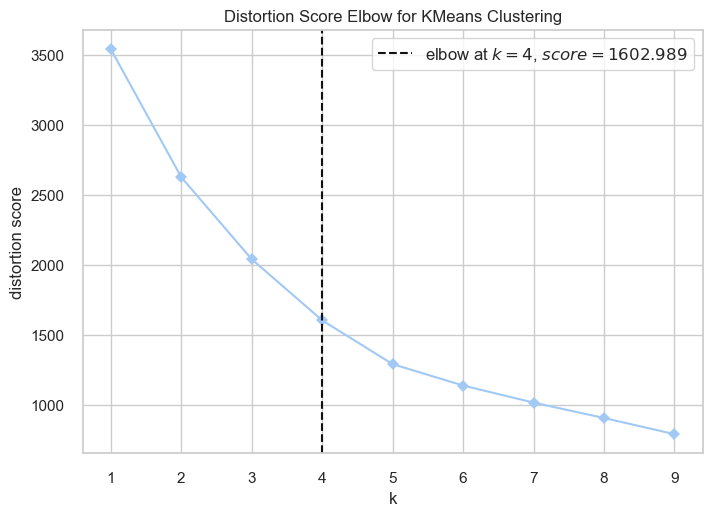

In [392]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,10), timings=False)
visualizer.fit(df_pca)
visualizer.show()
cluster_optimo = visualizer.elbow_value_


**Análisis**

En el gráfico anterior se evidencia la puntuación o score de distorsión en el eje Y, que representa la suma de las distancias al cuadrado de cada punto en el dataset a su centroide más cercano. Un valor más bajo en esta métrica da indicios de que los puntos están más cerca de sus centroides.

En este contexto, se evidencia que a medida que el número de clusters (k) aumenta de 1 a 4, el score mencionado disminuye rápidamente, indicando una mejora significativa en la agrupación. Sin embargo, después de k=4, la disminución en el score se hace más lenta. Esto sugiere que k=4 es el número óptimo de clusters para este conjunto de datos.

Incrementar el número de clusters despúes de este k óptimo, no resultaría en una mejora sustancial de la puntuación de distorsión, pues el cálculo de clusters adicionales no necesariamente capturarían estructuras signtificativas dentro del conjunto de datos objetivo, incluso, se podría correr el riesgo de caer en overfitting en donde se presentaría un problema de generalización a nuevos datos.





### Método de la Silueta

Este método se utiliza para evaluar que tan buenos son los agrupamientos que se están realizando con el conjunto de datos en cuestión. Para cada uno de los puntos se calcula la distancia promedio respecto al resto de puntos en el mismo cluster, además, la distancia promedio al cluster más cercano que sea distinto al que pertenece dicho punto. La silueta promedio de todos los puntos exhibe una medida de la calidad de los agrupamientos.

Para n_clusters = 2 El silhouette_score promedio es : 0.522374106082621
Para n_clusters = 3 El silhouette_score promedio es : 0.4188838755280555
Para n_clusters = 4 El silhouette_score promedio es : 0.4076823945021054
Para n_clusters = 5 El silhouette_score promedio es : 0.417405971810533
Para n_clusters = 6 El silhouette_score promedio es : 0.4234793642812109
Para n_clusters = 7 El silhouette_score promedio es : 0.42423942142865
Para n_clusters = 8 El silhouette_score promedio es : 0.4339589021312764
Para n_clusters = 9 El silhouette_score promedio es : 0.4182127695207224


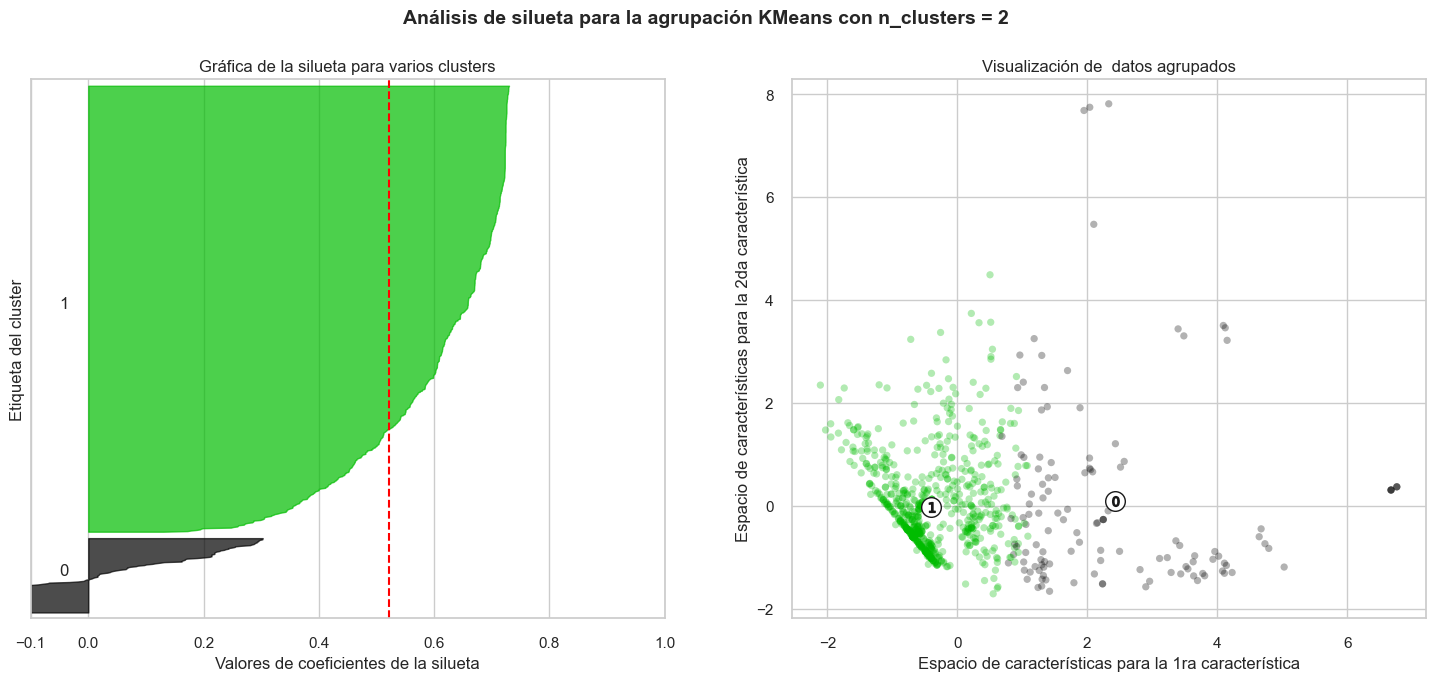

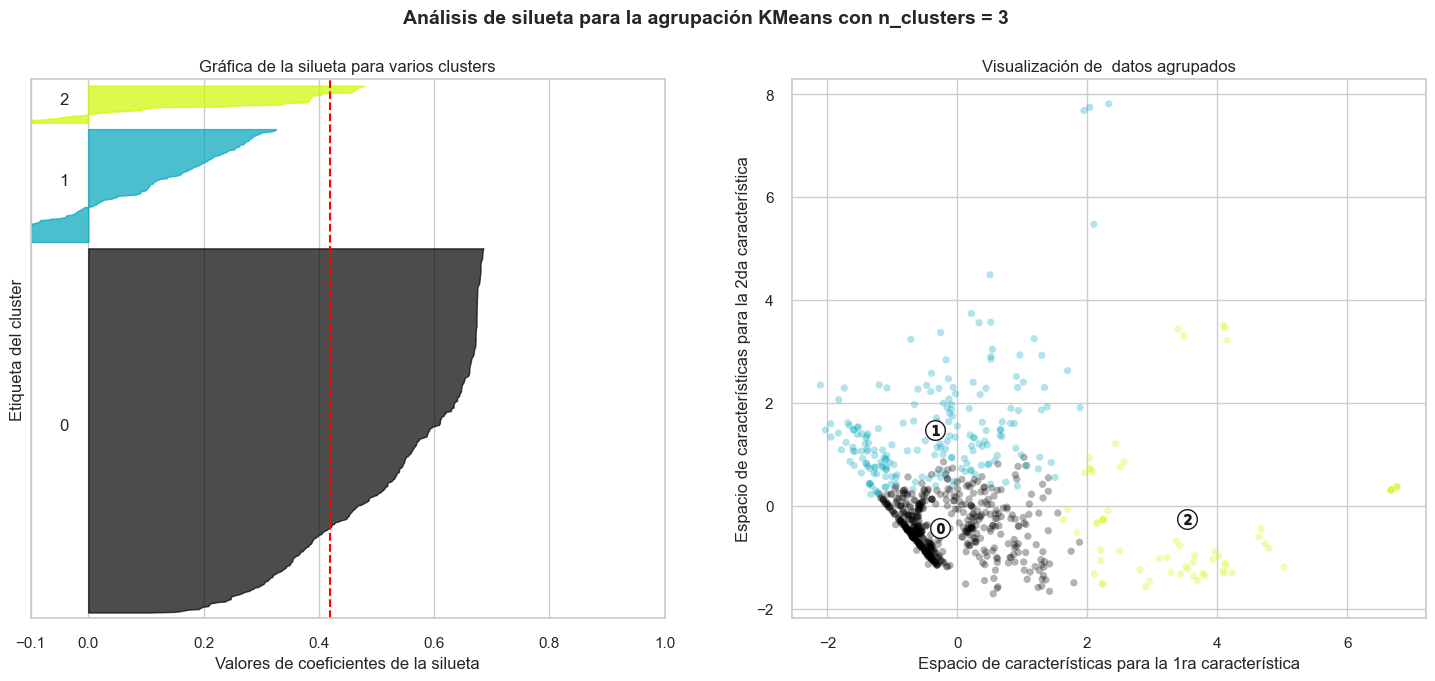

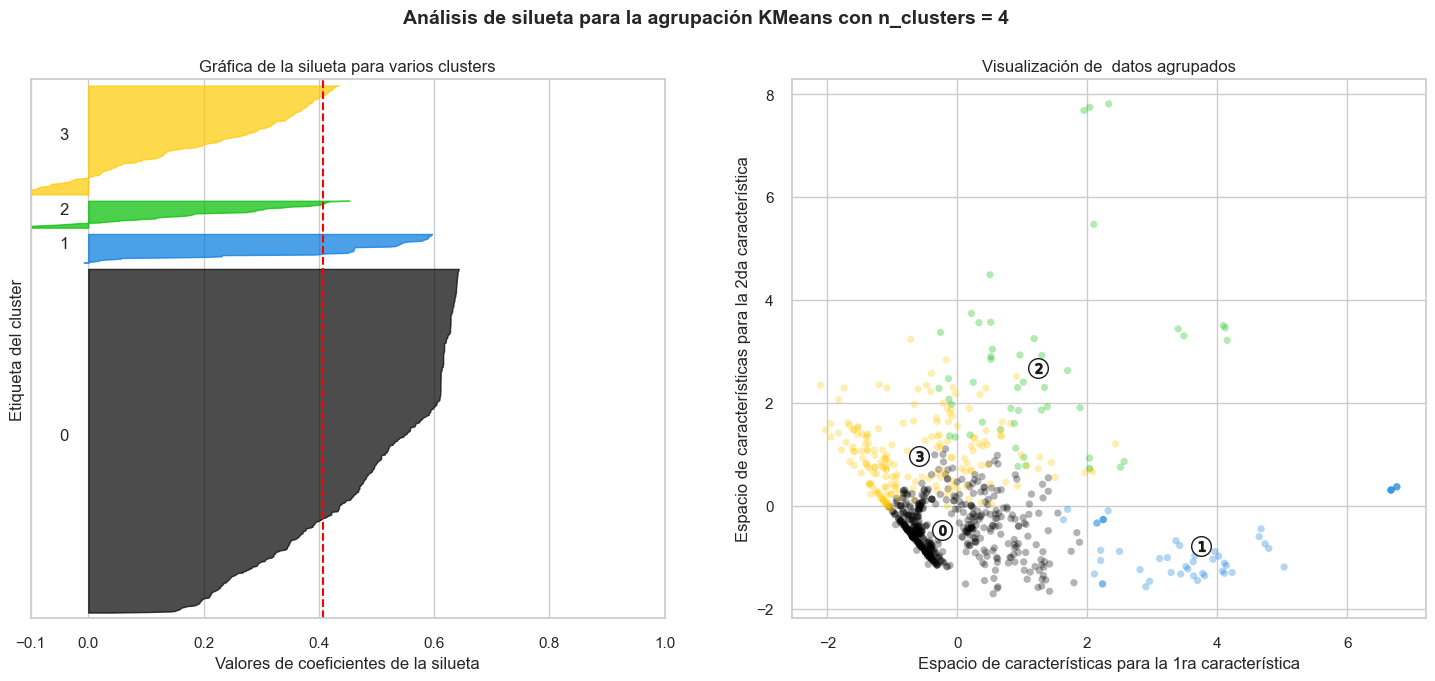

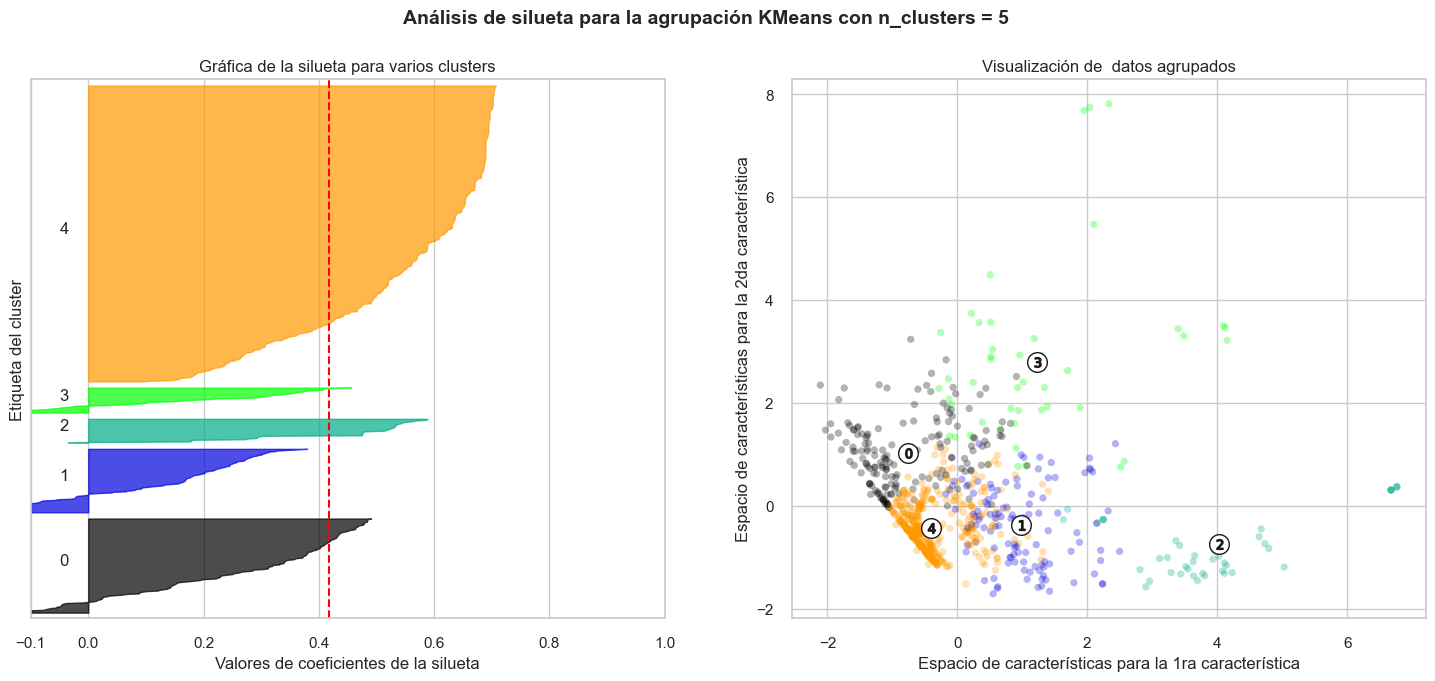

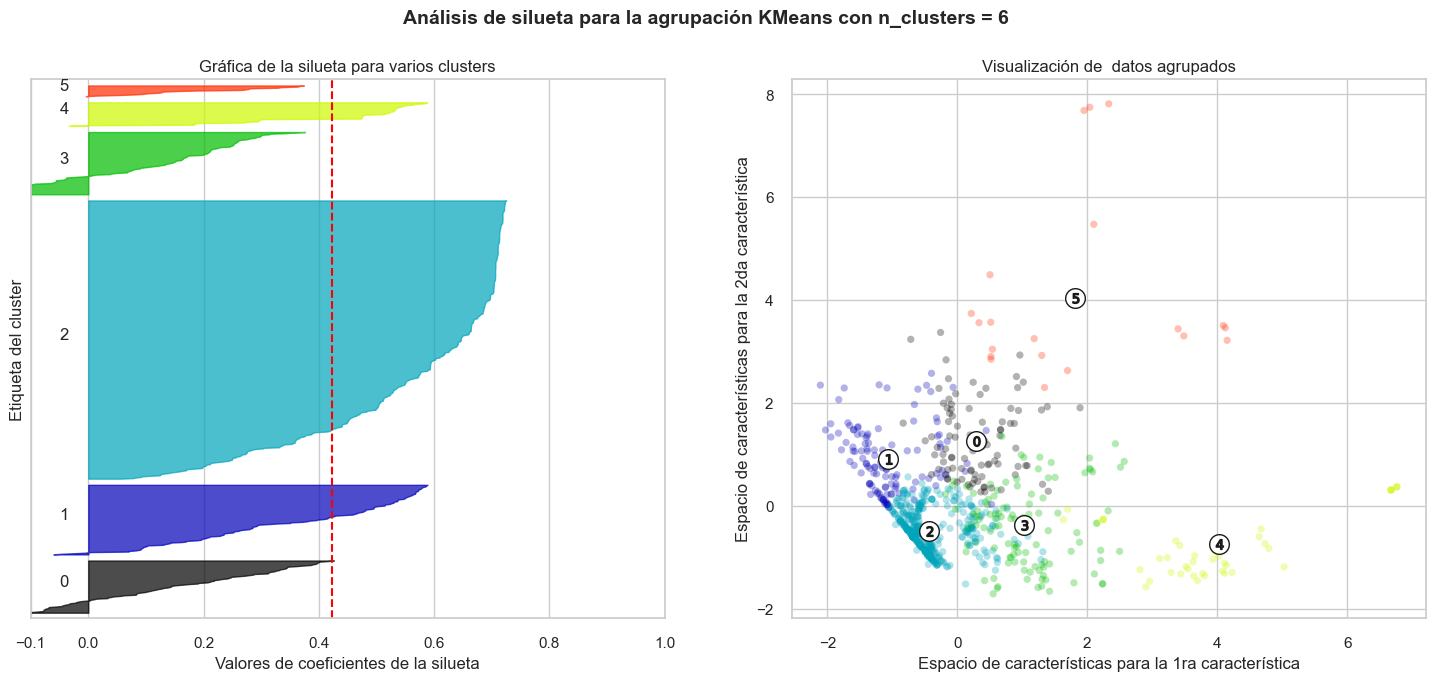

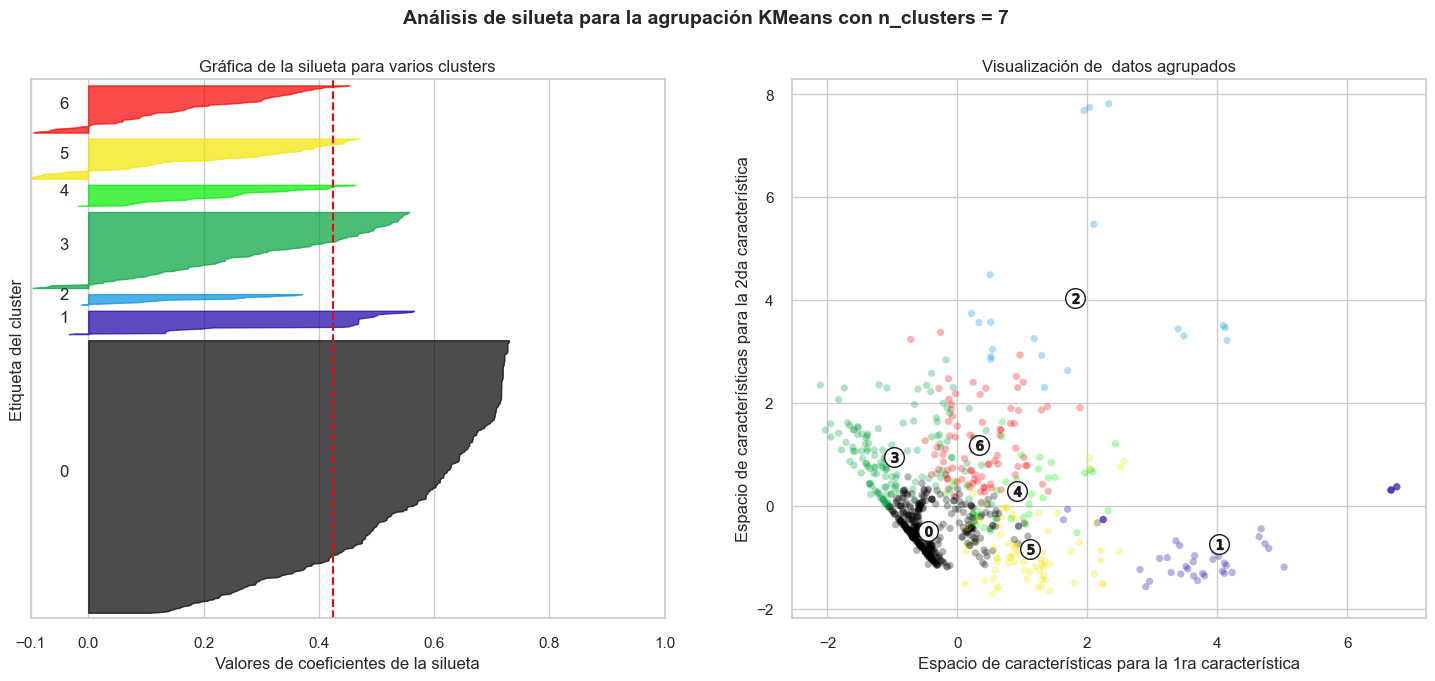

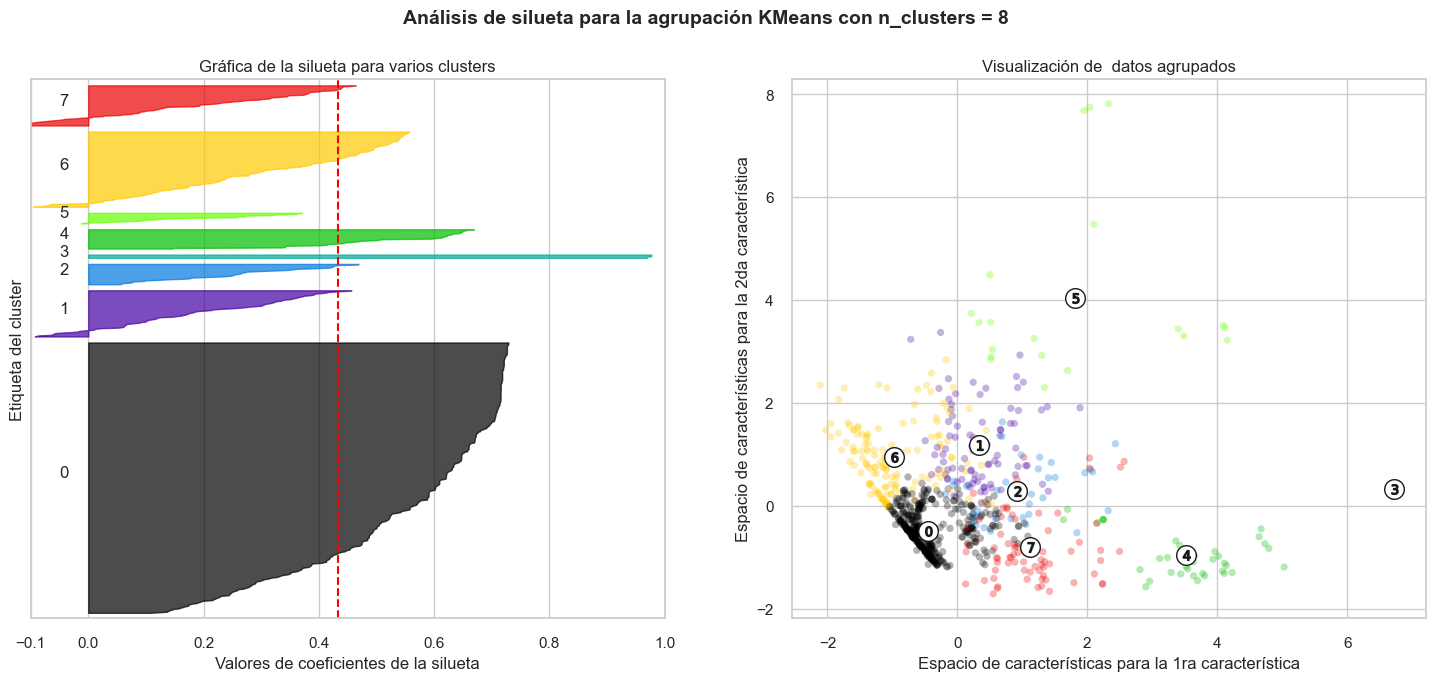

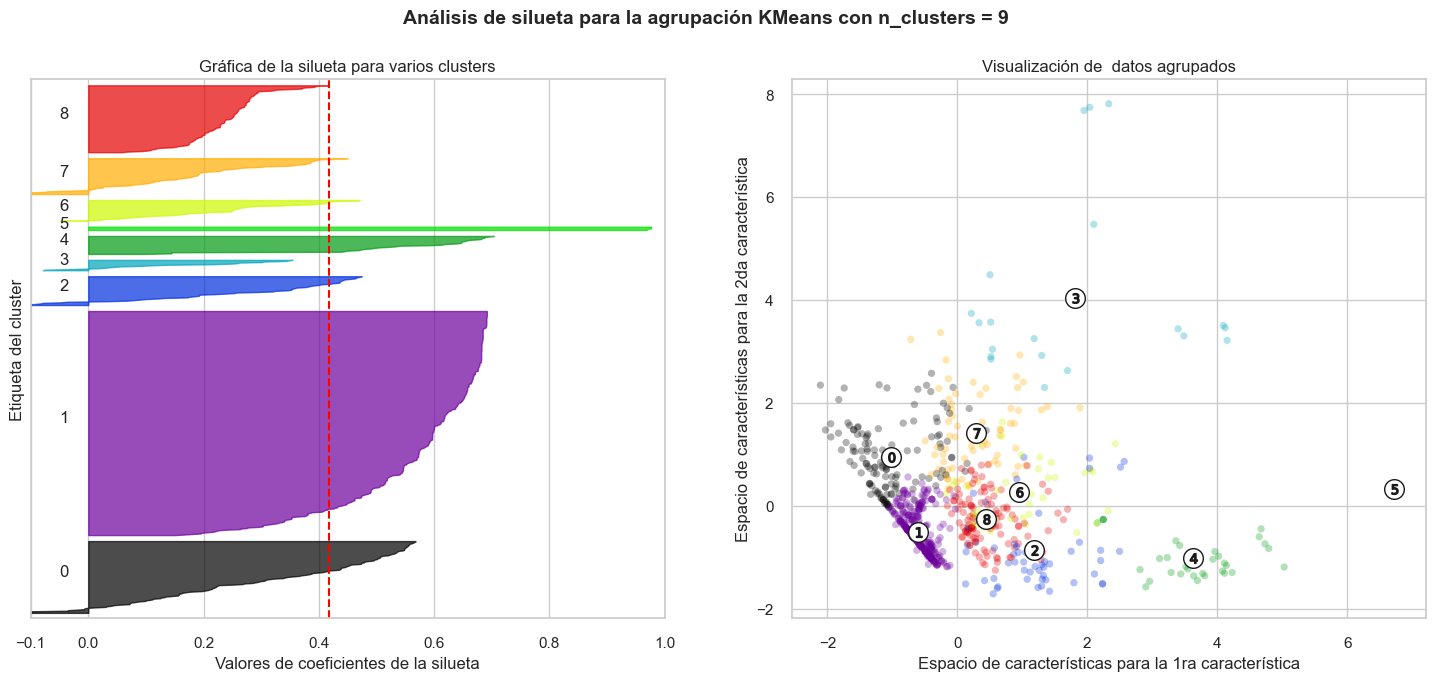

In [393]:
range_n_clusters = range(2, 10)  # Número de clusters que se probarán en el método

for n_clusters in range_n_clusters:
    # Crear una subplot con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configurar los límites de la gráfica de la silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Inicializar el modelo KMeans con el número de clusters actual
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # Calcular la puntuación de silueta media para todos los samples
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Calcular los valores de la silueta para cada muestra
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar los valores de silueta para cada cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar los clusters en la gráfica
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo 'y_lower' para el siguiente plot
        y_lower = y_upper + 10  

    ax1.set_title("Gráfica de la silueta para varios clusters")
    ax1.set_xlabel("Valores de coeficientes de la silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    # Línea vertical para el silhouette_score promedio de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Visualización de los clusters formados
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca['PC1'], df_pca['PC2'], marker='.', s=110, lw=0, alpha=0.3,
                c=colors, edgecolor='k')

    # Etiquetar los centroides de los clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización de  datos agrupados")
    ax2.set_xlabel("Espacio de características para la 1ra característica")
    ax2.set_ylabel("Espacio de características para la 2da característica")

    plt.suptitle(("Análisis de silueta para la agrupación KMeans "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


**Análisis**

Aunque el método de la silueta sugiere que se debe seleccionar el número óptimo de clusters basado en el score promedio más alto, en este caso, no es tan sencillo seguir esta recomendación.

Para un número de cluster igual a 2, el valor promedio del score de la silueta es de 0.52. Sin embargo, al examinar el gráfico, se observa que no todos los puntos agrupados en uno de los clusters están por encima de este promedio (indicado por la línea roja). Aunque es importante tener un score alto, también es crucial que no haya una cantidad significativa de puntos por debajo de dicho umbral, ya que esto puede indicar que algunos puntos están mal asignados.

Por lo tanto, es importante tener en cuenta el valor del score promedio como la distribución de los scores individuales dentro de los clusters para asegurar una agrupación efectiva.

### Método de Calinski Harabasz

El método de Calinski-Harabasz ofrece otra forma de evaluar la calidad de los agrupamientos en un conjunto de datos. A diferencia del método de la silueta, que se enfoca en la coherencia y separación de los clusters a nivel de punto, Calinski-Harabasz considera tanto la dispersión entre clusters como la cohesión dentro de los clusters. Para este método se busca el K que maximice la separación entre cluster, con cluster lo más compactos posibles.

In [394]:
CHs = []
for i in range(2,10) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    CH = calinski_harabasz_score(df_pca, km.labels_) 
    CHs.append(CH)

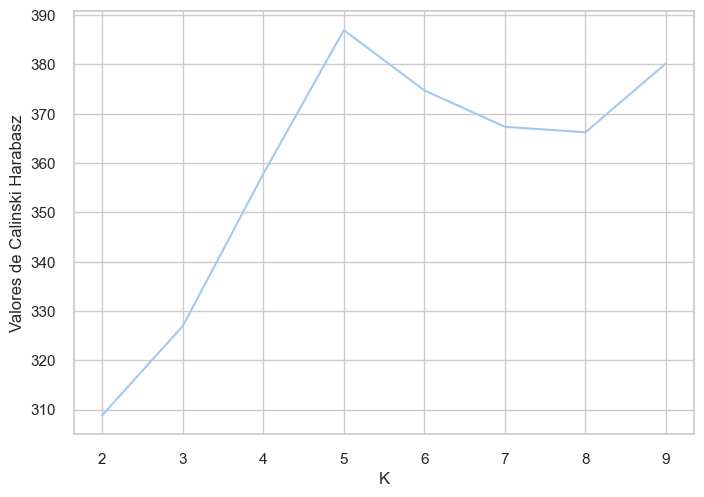

In [395]:
plt.plot(range(2, 10), CHs)
plt.ylabel("Valores de Calinski Harabasz")
plt.xlabel("K")
plt.show()

**Análisis**

El gráfico anterior muestra un pico pronunciado en k=5 según el método de Calinski-Harabasz, que mide la dispersión entre los clusters en comparación con la dispersión dentro de cada cluster. Este pico indica que 5 es el número óptimo de clusters para usar en el método de k-means. La razón es que, después de este punto, el índice disminuye significativamente, lo que sugiere que tener más de 5 clusters puede no ser adecuado y podría llevar a una peor agrupación.

**¿Qué metodo utilizar?**

Como se observó en las últimas aplicaciones, cada uno de los métodos sugiere un número de clusters diferentes. Sin embargo, es importante no dejar de lado que estos métodos son heurísticas que apoyan en la decisión de cuál es el mejor agrupamiento, por tanto, es responsabilidad del investigador seleccionar aquel que refleja la mejor aplicación o solución al problema que se esté analizando. 

Para este en objetivo en particular, en el que se busca llevar a cabo un proceso de caracterización de pasajeros se optará por guiar la selección del número óptimo de clusters a partir del Método del Codo. Esta decisión se basa en varios puntos. 

* Seleccionar 4 clusters proporciona al análisis un equilibrio óptimo entre la precisión del modelo y la complejidad de mismo. Por su parte, el método de la silueta que aunque perimitió analizar la cohesión y separación de la agrupaciones, sugiere una simplificación extrema que quizá no capture de manera adecuada la estructura de los datos a analizar (2 clusters). 

Por su parte, el método de calinski sugiere 5 clusters que pueden resultar en una mayor complejidad del modelo que no necesariamente está representada en una mejora significativa de la agrupación (veíamos a través del método del codo que después de 4 clusters la suma de las distancias al cuadrado de cada punto a su centroide más cercano disminuye de forma gradual o no importante).

* La selección de 4 clusters permite una interpretación más intuitiva (podemos afirmar esto, debido a que el método ya nos sugirió dicha cantidad de agrupaciones, no es una argumentación sin fundamentos), además, permite clasificar sin una segmentación excesiva de los datos. 

En conclusión, seguir la recomendación del método del codo y optar por 4 clusters ofrece un equilibrio ideal entre precisión, simplicidad y eficiencia, lo que puede aportar a la robustez del modelo y  asu fácil interpretación, buscando evitar tanto el sobreajuste como el subajuste de los datos.

### Método de K-Means con K=4

A partir de la elección del K-Óptimo que se generó en el paso anterior, se ejecutará un K-Means que corresponde a un algoritmo de aprendizaje no supervisado que agrupará los datos en 4 conglomerados. Esto servirá para identificar las características de los pasajeros que se tienen en el conjunto de datos.

In [396]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(df_pca)
clusters = kmeans.labels_

In [397]:
df_pca

,PC1,PC2,PC3,PC4
0,0.277744,-0.907169,-0.168053,-0.522068
1,0.218993,1.169490,-0.140027,-0.561837
2,-0.518989,-0.630017,0.219529,0.037646
3,0.213911,0.702348,-0.264351,-0.428492
4,-0.873119,-0.282642,-0.335472,-0.064275
...,...,...,...,...
886,-0.662896,-0.309735,0.173892,-0.042243
887,-0.215651,-0.349438,0.865640,-0.088298
888,1.101785,-0.158991,-0.308646,1.384722
889,-0.520816,-0.039205,0.518145,-0.287281


In [398]:
from collections import Counter

df_pca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 607, 1: 185, 3: 51, 2: 48})


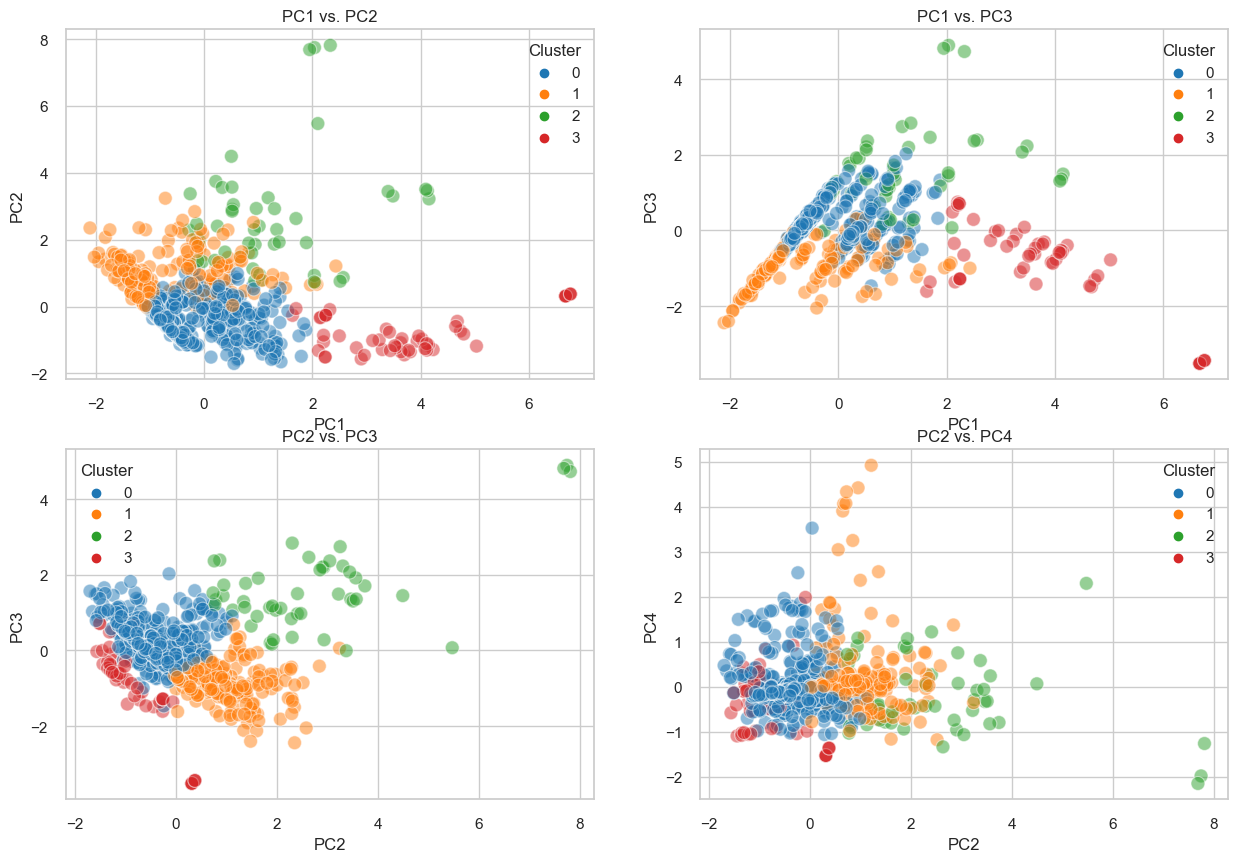

In [399]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, ax=ax, palette="tab10", s=100, alpha=0.5)
plt.title("PC1 vs. PC2")

ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=df_pca, ax=ax, palette="tab10", s=100, alpha=0.5)
plt.title("PC1 vs. PC3")

ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=df_pca, ax=ax, palette="tab10", s=100, alpha=0.5)
plt.title("PC2 vs. PC3")

ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="PC2", y="PC4", hue="Cluster", data=df_pca, ax=ax, palette="tab10", s=100, alpha=0.5)
plt.title("PC2 vs. PC4")

plt.show()


Ahora bien, con el objetivo de caracterizar los conglomerados con respecto a las variables originales, se cruzará la información del dataframe inicial con los cluster identificados.

In [400]:
# Cruce de información

df_train_PCA['Cluster']=df_pca['Cluster']
df_train_PCA

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Cluster
0,0,22.0,1,0,7.2500,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,1,0,0
887,1,19.0,0,0,30.0000,0,0,1,0,0,0
888,0,28.0,1,2,23.4500,0,0,1,0,1,0
889,1,26.0,0,0,30.0000,1,0,0,0,0,0


A continuación, se calculan las estadísticas descriptivas asociadas a cada cluster, enfoncandose en las características de los pasajeros que pertenecen a cada una de la agrupaciones.

In [401]:
# Filtrar las estadísticas descriptivas por cluster
clusters = df_train_PCA['Cluster'].unique()
statistics_by_cluster = {}

for cluster in clusters:
    cluster_data = df_train_PCA[df_train_PCA['Cluster'] == cluster]
    statistics_by_cluster[cluster] = cluster_data.describe(include='all')

# Imprimir las estadísticas descriptivas para cada cluster
for cluster, stats in statistics_by_cluster.items():
    print(f"Cluster {cluster} Statistics:\n", stats, "\n")

Cluster 0 Statistics:
          Survived         Age       SibSp       Parch        Fare    Sex_male  \
count  607.000000  607.000000  607.000000  607.000000  607.000000  607.000000   
mean     0.365733   25.068781    0.253707    0.212521   17.803026    0.688633   
std      0.482032    7.302587    0.482241    0.550405   17.551060    0.463435   
min      0.000000    0.420000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   21.000000    0.000000    0.000000    7.854200    0.000000   
50%      0.000000   28.000000    0.000000    0.000000   10.170800    1.000000   
75%      1.000000   28.000000    0.000000    0.000000   21.000000    1.000000   
max      1.000000   40.500000    2.000000    4.000000   93.500000    1.000000   

       Embarked_Q  Embarked_S    Pclass_2    Pclass_3  Cluster  
count  607.000000  607.000000  607.000000  607.000000    607.0  
mean     0.108731    0.714992    0.215815    0.655684      0.0  
std      0.311559    0.451791    0.411726    0.47553

Ahora, se propone un análisis gráfico para comparar algunas características de los pasajeros que pertenecen a cada uno de los clusters:

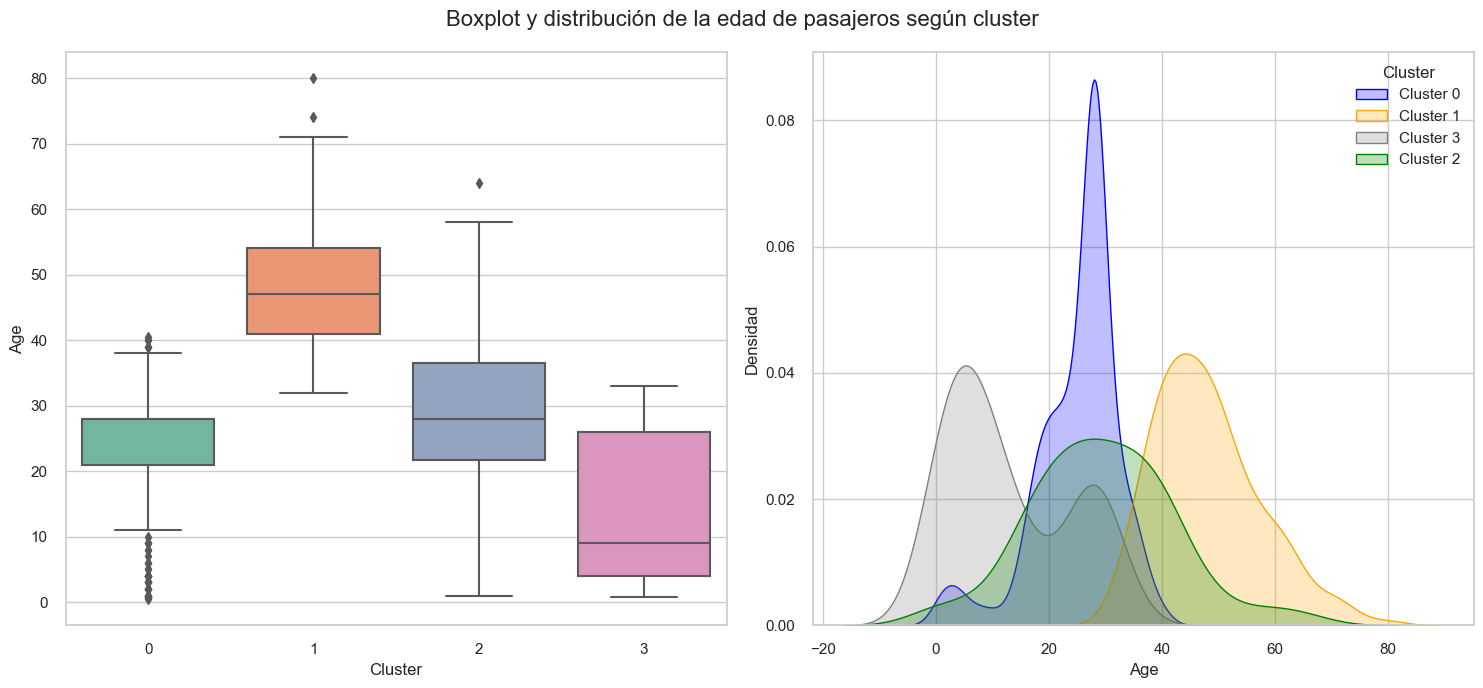

In [402]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear la figura y los subplots

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplot y distribución de la edad de pasajeros según cluster", fontsize=16)

# Diagrama de caja

plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_train_PCA['Cluster'], y=df_train_PCA['Age'], palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Age")

# Distribuciones de densidad

plt.subplot(1, 2, 2)
colors = ['blue', 'orange', 'green', 'grey']
for cluster in df_train_PCA['Cluster'].unique():
    sns.kdeplot(df_train_PCA[df_train_PCA['Cluster'] == cluster]['Age'], shade=True, color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel("Age")
plt.ylabel("Densidad")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


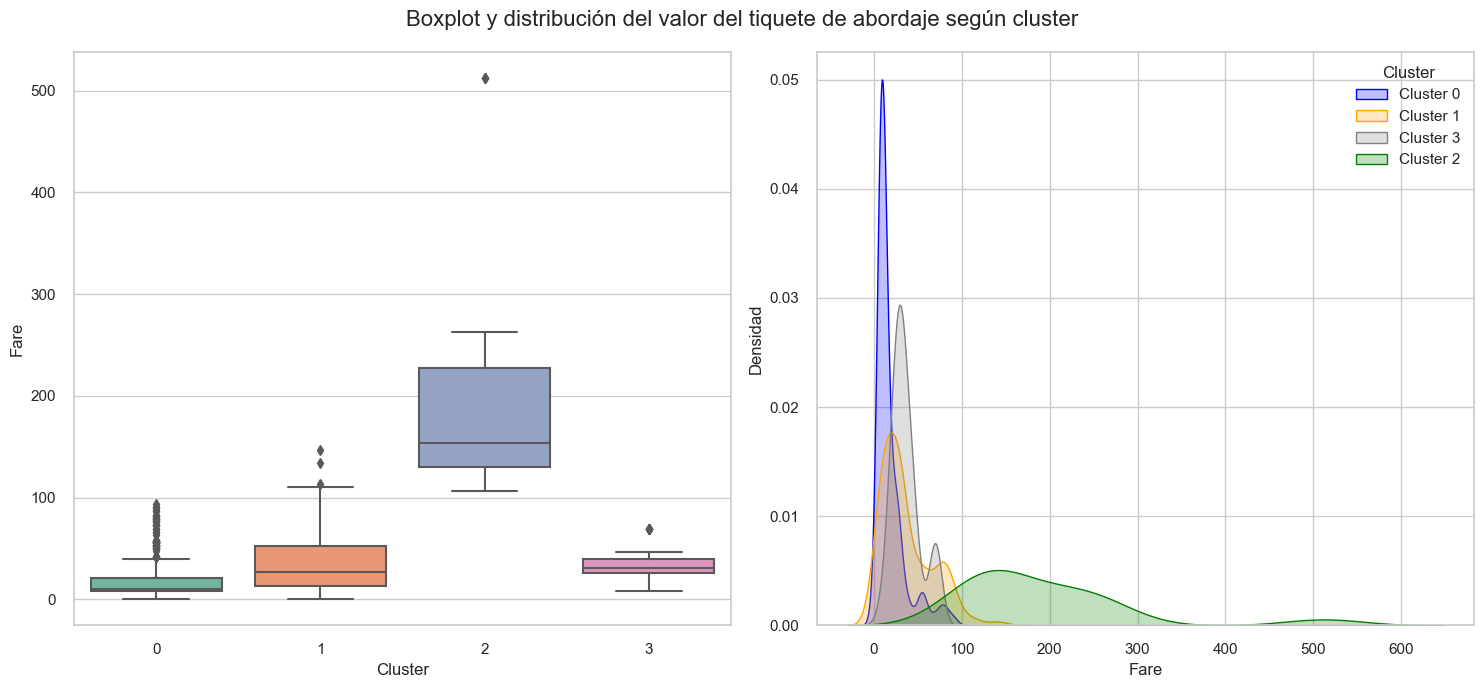

In [403]:
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear la figura y los subplots

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplot y distribución del valor del tiquete de abordaje según cluster", fontsize=16)

# Diagrama de caja

plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_train_PCA['Cluster'], y=df_train_PCA['Fare'], palette="Set2")
plt.xlabel("Cluster")
plt.ylabel("Fare")

# Distribuciones de densidad

plt.subplot(1, 2, 2)
colors = ['blue', 'orange', 'green', 'grey']
for cluster in df_train_PCA['Cluster'].unique():
    sns.kdeplot(df_train_PCA[df_train_PCA['Cluster'] == cluster]['Fare'], shade=True, color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel("Fare")
plt.ylabel("Densidad")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

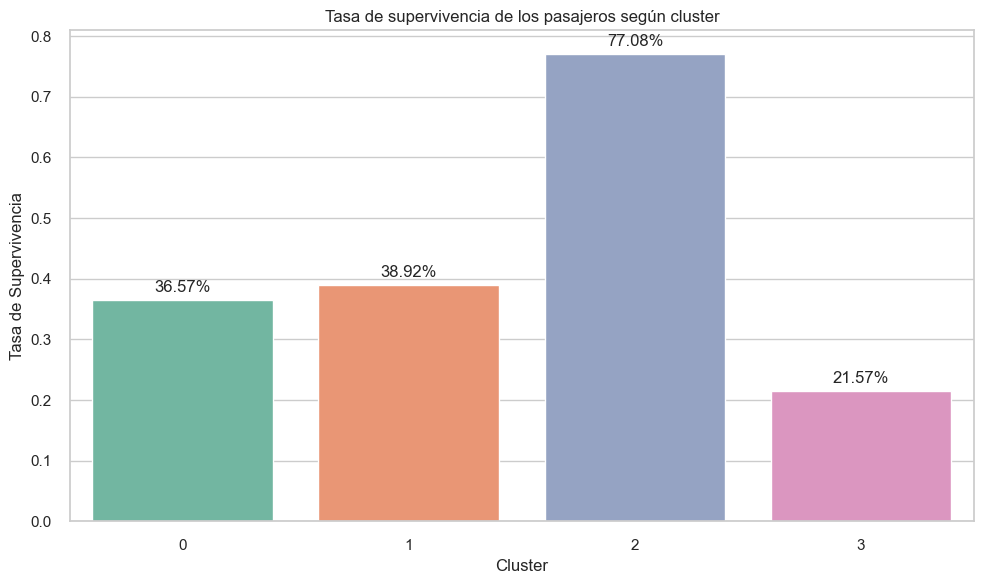

In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la tasa de supervivencia por cluster
survival_rates = df_train_PCA.groupby('Cluster')['Survived'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cluster', y='Survived', data=survival_rates, palette="Set2")

# Añadir etiquetas y título
plt.xlabel("Cluster")
plt.ylabel("Tasa de Supervivencia")
plt.title("Tasa de supervivencia de los pasajeros según cluster")

# Mostrar el porcentaje en la parte superior de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


**Conclusiones**

Teniendo en cuenta la información proporcionada a través del algortimo de K-Means para la caracterización de los pasajeros, se encontraron las siguientes características por agrupación:

**Cluster 0 / 607 pasajeros**

- Los individuos de este cluster tienen una edad promedio de 25 años, además se caracterizan por ser pasajeros que no tienen hermanos o parejas dentro de la embarcación. Un dato importante a tener en cuenta, es que la mayor proporción de los pasajeros en este cluster son hombres (68,8%). Finalmente, el 71,5% de los pasajeros de este cluster embarcó en el puerto S.

**Cluster 1 / 185 pasajeros**

- En este cluster se encuentran pasajeros que en su mayoría viajan en primera clase, debido a que las variables PClass2 y PClass3 exhiben que el 26,5% y el 24,9% viajan en segunda y tercera clase, respectivamente. Adicionalmente, se encuentra en esta agrupación un grupo de pasajeros mayor frente al cluster 0, pues el promedio de la edad es de 48 años. Así como se observa en el cluster anterior, la mayoría de los pasajeros en esta agrupación son hombres (64,3%)


**Cluster 2 / 48 pasajeros**

- Los pasajeros asociados agrupados a este agrupamiento exhiben la proporción más alta de individuos que sobreviven, asociada al 77,0%. Estos pasajeros tiene una edad promedio de 29 años y la mayoría son mujeres (promedio del género femenino es de 68,8%). También, un resultado importante de este cluster, es que todos los pasajeros pertenecen a primera clase. 

**Cluster 3 / 51 pasajeros**

- En este cluster la mayoría de los pasajeros son niños y jovenes, pues la edad promedio corresponde a 12,8 años. Adicionalmente, se encontró una paridad entre los géneros de este grupo, pues el 49,0% del mismo corresponde al género masculino. En este caso, se destaca que el 92,2% de los pasajeros de este conglomerado viajaban en tercera clase, es decir, dados los resultados de los últimos cluster, pareciera que la clase fue determinante en la sobrevivencia de los pasajeros, pues para este grupo solo el 21,6% sobrevivió. 






# Comparar modelos

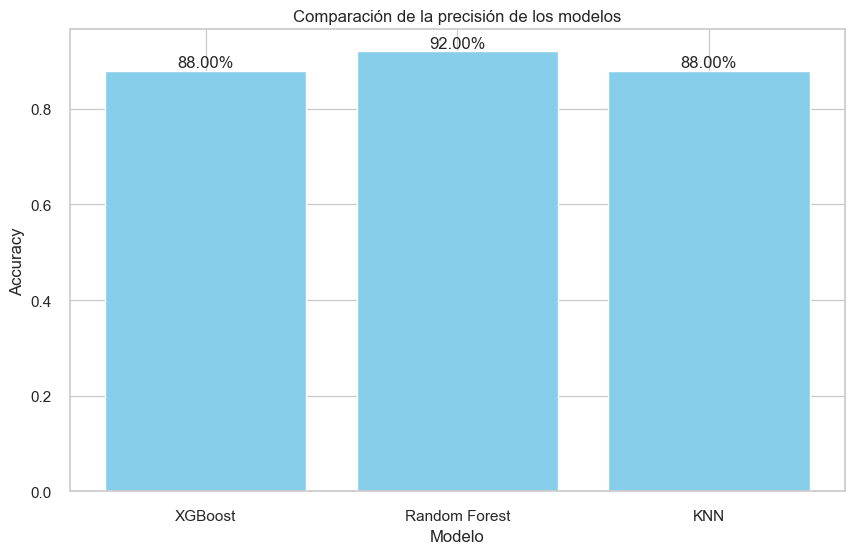

In [405]:
accuracy_list = []
for i in [XGBOOST_class_report, RANDOM_FOREST_report, KNN_class_report]:
    accuracy = float(i.split('\n')[5].split()[1])
    accuracy_list.append(accuracy)

plot_data = pd.DataFrame({'Modelo': ['XGBoost', 'Random Forest', 'KNN'], 'Accuracy': accuracy_list})

plt.figure(figsize=(10, 6))
plt.bar(plot_data['Modelo'], plot_data['Accuracy'], color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de la precisión de los modelos')
for i in range(len(accuracy_list)):
	plt.text(i, accuracy_list[i], f'{accuracy_list[i]:.2%}', ha = 'center', va = 'bottom')
plt.show()

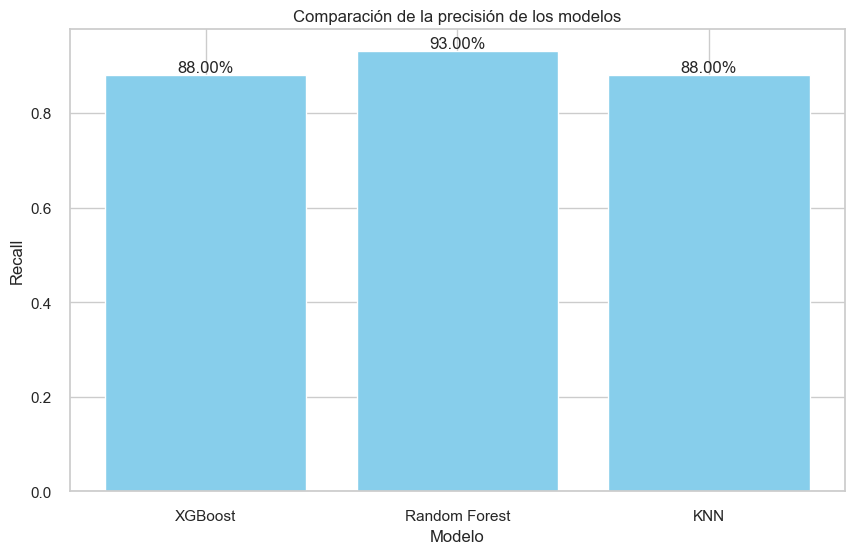

In [406]:
recall_list = []
for i in [XGBOOST_class_report, RANDOM_FOREST_report, KNN_class_report]:
    recall = float(i.split('\n')[7].split()[2])
    recall_list.append(recall)

plot_data = pd.DataFrame({'Modelo': ['XGBoost', 'Random Forest', 'KNN'], 'Recall': recall_list})
plot_data

plt.figure(figsize=(10, 6))
plt.bar(plot_data['Modelo'], plot_data['Recall'], color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.title('Comparación de la precisión de los modelos')
for i in range(len(recall_list)):
	plt.text(i, recall_list[i], f'{recall_list[i]:.2%}', ha = 'center', va = 'bottom')
plt.show()

## Conclusión

Basado en las métricas de evaluación de precisión, recall y f1-score, el modelo Random Forest se destaca como el mejor modelo con una precisión del 93%, superando a XGBoost y KNN, que tienen precisiones del 88% y 87% respectivamente. Random Forest muestra un excelente rendimiento en la identificación de ambas clases, especialmente con un recall del 97% para la clase 0 y un f1-score general del 93%, lo que sugiere que es el modelo más efectivo para capturar los patrones subyacentes en los datos. XGBoost, aunque también muestra un buen rendimiento general, tiene un balance razonable entre precisión y recall. Por otro lado, KNN, aunque simple y fácil de interpretar, tiene el rendimiento más bajo entre los tres modelos, con dificultades para identificar correctamente la clase 1.

In [410]:
submission_df = pd.DataFrame(predicciones_test, columns=['Survived'])
submission_df = pd.concat([submission_df, data_test_merged['PassengerId']], axis=1)
submission_df = submission_df[['PassengerId', 'Survived']]
submission_df['Survived'] = submission_df['Survived'].astype(int)
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [411]:
submission_df.to_csv('submission.csv', index=False)